# 지역화폐 보정중 팀 코딩 발표 


## * 소비자 입장에서 지역화폐 사용의 맹점

1. 인센티브율

2. 지급한도

3. 가맹점 수

4. 사용 편의성

예산은 한정되어 있기 때문에 현실적으로 최적의 인센티브율과 최적의 지급한도를 알아내는 것이 중요하다고 판단하였다.

지금까지 경기도에서 적용되었던 시군별 인센티브율과 지급한도, 그리고 지역화폐 사용량 데이터가 필요하다.





###

### * Data : 지역화폐
경기데이터드림(https://data.gg.go.kr/portal/searchPage.do?searchWord=%EC%A7%80%EC%97%AD%ED%99%94%ED%8F%90)
- 지역화폐 발행 및 이용현황 (19년 ~ 22년)
- 지역화폐 발행 및 이용현황 (23년)
- 지역화폐 가맹점 현황(22년, 24년)

지역화폐 발행 및 이용현황

In [10]:
import pandas as pd

## 지역화폐 발행 및 이용현황(23년)
use_2023 = pd.read_csv('../data/경기도/원본/지역화폐발행및이용현황.csv',encoding='cp949')
use_2023

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,4051,2140
1,가평군,2023-11,458.0,2368,2187
2,가평군,2023-10,555.0,2596,2335
3,가평군,2023-09,782.0,3113,2376
4,가평군,2023-08,473.0,3631,2392
...,...,...,...,...,...
367,화성시,2023-05,6717.0,35058,37413
368,화성시,2023-04,8440.0,35557,35525
369,화성시,2023-03,9111.0,35906,36982
370,화성시,2023-02,7829.0,30162,33325


In [50]:
use_2023.columns = ['시군명', '기준년월', '신규가입자수', '월별충전액', '월별사용액']

지역화폐 가맹점 현황

In [22]:
## 지역화폐 가맹점 현황(24년3월)
store_2023 = pd.read_csv('../data/경기도/원본/지역화폐 가맹점_20240331.csv',encoding='cp949')
store_2023.head()

,시군명,상호명,업종명(종목명),소재지도로명주소,소재지지번주소,우편번호,위도,경도,사업자등록번호,업종코드,가맹점번호,휴폐업상태,휴폐업상태코드,폐업일자,데이터기준일자
0,고양시,까망노래연습장,노래방,경기도 고양시 일산동구 탄중로 322,"경기도 고양시 일산동구 중산동 1570-3번지 고봉프라자 201,202호",10333.0,37.693153,126.780748,102-30-07121,8402,979093887,NaN,NaN,NaN,20240331
1,고양시,일산좋은치과의원,치과,경기도 고양시 일산동구 일산로 441,경기도 고양시 일산동구 정발산동 1204번지 일성조합상가 3층 301호,10359.0,37.673089,126.777688,160-97-00108,4201,979091022,NaN,NaN,NaN,20240331
2,고양시,잉크존,"문구,사무용품",경기도 고양시 일산서구 중앙로 1388,경기도 고양시 일산서구 주엽동 73번지 강선마을11단지아파트 지하1층 28호,10366.0,37.668358,126.766100,660-03-00201,8102,979075504,NaN,NaN,NaN,20240331
3,고양시,참좋은집,오양.보육.복지시설,경기도 고양시 일산동구 고봉로770번길 211-1,경기도 고양시 일산동구 성석동 1061-40번지,10252.0,37.717316,126.796933,815-80-00122,7301,976706432,NaN,NaN,NaN,20240331
4,고양시,(주)팩토리빈,커피전문점,경기도 고양시 일산동구 멱절길 368-104,경기도 고양시 일산동구 장항동 671-9번지 1층,10397.0,37.650748,126.760605,463-81-00044,2502,976704676,NaN,NaN,NaN,20240331


In [23]:
# 휴업상태코드 NA or 1(영업중)인 가맹점만 필터 
store_2023 = store_2023[(store_2023['휴폐업상태코드'].isna()) | (store_2023['휴폐업상태코드'] == 1)]

# 시군별로 그룹화
store_2023 =store_2023[['시군명','업종코드']].groupby('시군명').count()
# 컬럼명 변경
store_2023.columns = ['가맹점수']

store_2023.head(10)

,가맹점수
시군명,
가평군,3354
고양시,26672
과천시,1674
광명시,7835
광주시,11204
구리시,6281
군포시,7369
김포시,14172
남양주시,20530


In [ ]:
# 시군별 가맹점수 저장
store_2023.to_csv('../data/경기도/전처리 후/count_store.csv')

경기도 주민등록인구 현황

In [28]:
## 경기도 주민등록인구 집계현황 (08년 ~ 24년)
popul = pd.read_csv('../data/경기도/원본/주민등록인구집계현황.csv', encoding='cp949')
popul

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2024,4,도,경기도,13648156,970596,1317378,1661407,1882433,2240377,...,643160,788080,899825,1097711,1166315,933547,463387,267887,49706,1504
1,2024,4,시군,경기도 가평군,62281,2686,4276,5620,5466,7253,...,2102,2382,2492,3389,5096,6623,3858,2509,443,16
2,2024,4,읍면동,경기도 가평군 가평읍,21038,1096,1754,2155,2148,2759,...,851,941,1054,1324,1724,1947,1092,806,136,7
3,2024,4,읍면동,경기도 가평군 북면,3604,84,165,190,194,318,...,84,72,87,131,260,505,303,204,45,2
4,2024,4,읍면동,경기도 가평군 상면,5420,114,197,377,367,479,...,86,119,151,218,489,729,427,246,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119477,2008,1,읍면동,경기도 화성시 팔탄면,9900,869,869,1694,1671,1735,...,407,606,596,717,579,455,373,120,23,0
119478,2008,1,읍면동,경기도 화성시 향남읍,21100,2828,2288,3151,4316,3415,...,1136,1444,1835,1467,1107,797,622,180,34,4
119479,2008,1,읍면동,경기도 화성시 향남읍,21100,2828,2288,3151,4316,3415,...,1136,1444,1835,1467,1107,797,622,180,34,4
119480,2008,1,읍면동,경기도 화성시 화산동,23684,3727,2793,3515,5424,3869,...,1296,1699,2528,1737,1079,686,419,115,19,0


In [29]:
# 2023년 필터
popul_2023 = popul.loc[popul['연도'] == 2023].loc[popul['행정구역구분명'] == '시군']

# '기준년월' 컬럼 생성
popul_2023['기준년월'] = popul_2023['연도'].astype(str) + popul_2023['월'].astype(str)

# '기준년월' 형식을 'yyyy-mm'으로 변환
popul_2023['기준년월'] = popul_2023['기준년월'].astype(str).apply(lambda x: x[:4] + '-' + ('0' + x[4:] if len(x) == 5 else x[4:]))

# '행정구역명' 형식 변경
popul_2023['행정구역명'] = popul_2023['행정구역명'].map(lambda x: x.strip('경기도'))
popul_2023['행정구역명'] = popul_2023['행정구역명'].map(lambda x: x.strip())


popul_2023 = popul_2023[['기준년월','행정구역명','총 인구수']].reset_index(drop=True)

# 컬럼명 변경
popul_2023.columns = ['기준년월','시군명','총인구수']
popul_2023


,기준년월,시군명,총인구수
0,2023-12,가평군,62302
1,2023-12,고양시,1074907
2,2023-12,과천시,81000
3,2023-12,광명시,280197
4,2023-12,광주시,391377
...,...,...,...
367,2023-01,파주시,495480
368,2023-01,평택시,580011
369,2023-01,포천시,146374
370,2023-01,하남시,326496


### * Data : 인센티브 현황

경기지역화폐 홈페이지 (https://www.gmoney.or.kr/base/gmoney/insentive/index?menuLevel=2&menuNo=72)
- 인센티브 현황 (23년01월 ~ 24년6월) 

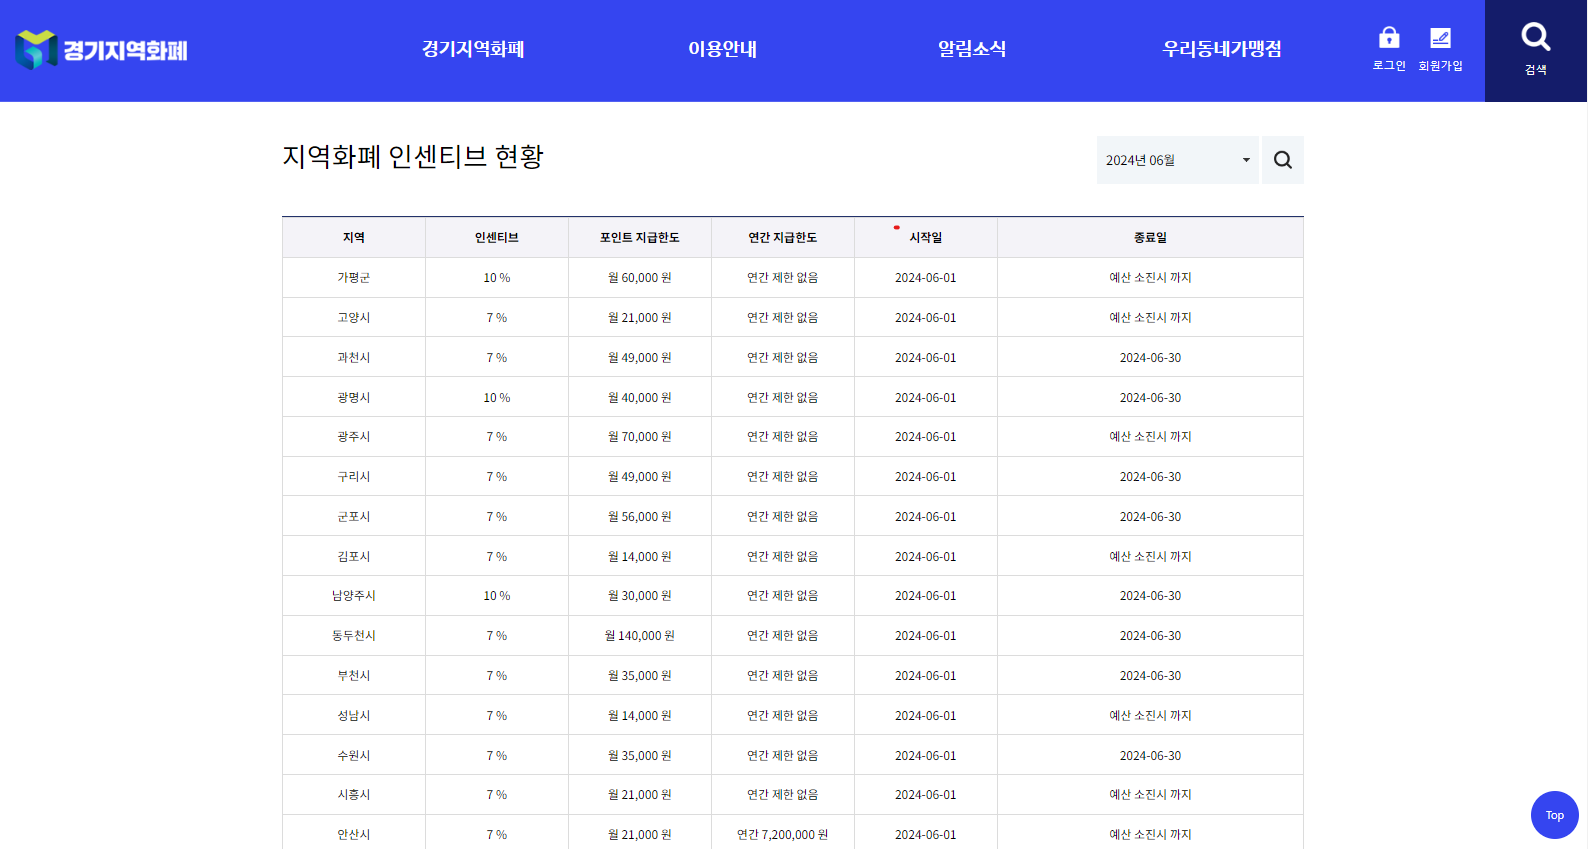

경기지역화폐 인센티브 현황 크롤링

In [4]:
from selenium import webdriver

# 경기지역화폐 홈페이지 팝업
driver = webdriver.Chrome()
driver.get('https://www.gmoney.or.kr/base/gmoney/insentive/index?menuLevel=2&menuNo=72&searchDate=202406')

# URL에서 테이블을 읽어옴
tables = pd.read_html(driver.page_source)

# 테이블의 리스트 중 첫 번째 데이터 프레임 사용
df = tables[0]

# driver close
driver.close()

df

,지역,인센티브,포인트 지급한도,연간 지급한도,시작일,종료일
0,가평군,10 %,"월 60,000 원",연간 제한 없음,2024-06-01,예산 소진시 까지
1,고양시,7 %,"월 21,000 원",연간 제한 없음,2024-06-01,예산 소진시 까지
2,과천시,7 %,"월 49,000 원",연간 제한 없음,2024-06-01,2024-06-30
3,광명시,10 %,"월 40,000 원",연간 제한 없음,2024-06-01,2024-06-30
4,광주시,7 %,"월 70,000 원",연간 제한 없음,2024-06-01,예산 소진시 까지
5,구리시,7 %,"월 49,000 원",연간 제한 없음,2024-06-01,2024-06-30
6,군포시,7 %,"월 56,000 원",연간 제한 없음,2024-06-01,2024-06-30
7,김포시,7 %,"월 14,000 원",연간 제한 없음,2024-06-01,예산 소진시 까지
8,남양주시,10 %,"월 30,000 원",연간 제한 없음,2024-06-01,2024-06-30
9,동두천시,7 %,"월 140,000 원",연간 제한 없음,2024-06-01,2024-06-30


In [ ]:
## 인센티브현황 df 저장
df.to_csv('./data/경기도/인센티브율/202406.csv', index=False)

인센티브 현황 2023년 종합

In [5]:
import os

# 파일 경로 및 파일명 설정
file_paths = [f"../data/경기도/인센티브율/2023{i:02}.csv" for i in range(1,13)]
file_paths

['../data/경기도/인센티브율/202301.csv',
 '../data/경기도/인센티브율/202302.csv',
 '../data/경기도/인센티브율/202303.csv',
 '../data/경기도/인센티브율/202304.csv',
 '../data/경기도/인센티브율/202305.csv',
 '../data/경기도/인센티브율/202306.csv',
 '../data/경기도/인센티브율/202307.csv',
 '../data/경기도/인센티브율/202308.csv',
 '../data/경기도/인센티브율/202309.csv',
 '../data/경기도/인센티브율/202310.csv',
 '../data/경기도/인센티브율/202311.csv',
 '../data/경기도/인센티브율/202312.csv']

In [6]:
# 모든 파일을 하나의 df로 합치기
df_list = []
for file_path in file_paths:
    month_data = pd.read_csv(file_path)
    # 파일명에서 년월 추출하여 '기준년월' 컬럼 추가
    month_data['기준년월'] = '2023-' + os.path.basename(file_path).split('.')[0][-2:]
    df_list.append(month_data)
df_list

[      지역  인센티브     포인트 지급한도       연간 지급한도         시작일         종료일     기준년월
 0    가평군  10 %   월 50,000 원      연간 제한 없음  2023-01-01  2023-01-31  2023-01
 1    고양시     -            -             -           -           -  2023-01
 2    과천시  10 %   월 30,000 원      연간 제한 없음  2023-01-01  2023-01-31  2023-01
 3    광명시  10 %  월 100,000 원      연간 제한 없음  2023-01-04  2023-01-31  2023-01
 4    광주시  10 %  월 100,000 원      연간 제한 없음  2023-01-01  2023-01-31  2023-01
 5    구리시  10 %  월 100,000 원      연간 제한 없음  2023-01-01   예산 소진시 까지  2023-01
 6    군포시  10 %   월 40,000 원      연간 제한 없음  2023-01-01  2023-01-31  2023-01
 7    김포시   6 %   월 12,000 원      연간 제한 없음  2023-01-01   예산 소진시 까지  2023-01
 8   남양주시     -            -             -           -           -  2023-01
 9   동두천시  10 %  월 100,000 원      연간 제한 없음  2023-01-01  2023-01-31  2023-01
 10   부천시  10 %   월 30,000 원      연간 제한 없음  2023-01-02  2023-01-31  2023-01
 11   성남시  10 %   월 30,000 원      연간 제한 없음  2023-01-17   예산 소진시 까지  2023-01
 12   수원시  1

In [38]:
# 모든 데이터프레임을 하나로 합치기
incen_2023 = pd.concat(df_list, ignore_index=True)
incen_2023

,지역,인센티브,포인트 지급한도,연간 지급한도,시작일,종료일,기준년월
0,가평군,10 %,"월 50,000 원",연간 제한 없음,2023-01-01,2023-01-31,2023-01
1,고양시,-,-,-,-,-,2023-01
2,과천시,10 %,"월 30,000 원",연간 제한 없음,2023-01-01,2023-01-31,2023-01
3,광명시,10 %,"월 100,000 원",연간 제한 없음,2023-01-04,2023-01-31,2023-01
4,광주시,10 %,"월 100,000 원",연간 제한 없음,2023-01-01,2023-01-31,2023-01
...,...,...,...,...,...,...,...
367,파주시,10 %,"월 20,000 원",연간 제한 없음,2023-12-01,2023-12-31,2023-12
368,평택시,-,-,-,-,-,2023-12
369,포천시,-,-,-,-,-,2023-12
370,하남시,7 %,"월 49,000 원",연간 제한 없음,2023-12-01,2023-12-31,2023-12


In [39]:
# 컬럼명 변경
incen_2023.rename(columns={'지역':'시군명'},inplace=True)

# 필요없는 컬럼 제거
incen_2023.drop(['연간 지급한도', '시작일', '종료일'], axis=1, inplace=True)

# value에서 '월', '원' 제거
incen_2023['포인트 지급한도']= incen_2023['포인트 지급한도'].map(lambda x : x.lstrip('월').rstrip('원'). strip())

# 컬럼명 변경
incen_2023.rename(columns={'포인트 지급한도':'월지급한도'},inplace=True)

incen_2023

,시군명,인센티브,월지급한도,기준년월
0,가평군,10 %,"50,000",2023-01
1,고양시,-,-,2023-01
2,과천시,10 %,"30,000",2023-01
3,광명시,10 %,"100,000",2023-01
4,광주시,10 %,"100,000",2023-01
...,...,...,...,...
367,파주시,10 %,"20,000",2023-12
368,평택시,-,-,2023-12
369,포천시,-,-,2023-12
370,하남시,7 %,"49,000",2023-12


## * 데이터 결합
popul_2023, store_2023, use_2023, incen_2023

In [71]:
## 데이터프레임 결합
df_combined = pd.merge(popul_2023,use_2023, how='left', on=['기준년월','시군명'])
df_combined = pd.merge(df_combined,incen_2023, how='left',on=['기준년월','시군명'])
df_combined = pd.merge(df_combined,store_2023, how='left', on='시군명')
df_combined = df_combined.sort_values(by=['시군명','기준년월']).reset_index(drop=True)
df_combined

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수
0,2023-01,가평군,62114,717.0,3140,3540,10 %,"50,000",3354
1,2023-02,가평군,62069,769.0,3032,3092,10 %,"50,000",3354
2,2023-03,가평군,61969,3130.0,4284,3609,10 %,"500,000",3354
3,2023-04,가평군,61915,855.0,3668,4057,10 %,"500,000",3354
4,2023-05,가평군,61836,871.0,5064,3785,10 %,"500,000",3354
...,...,...,...,...,...,...,...,...,...
367,2023-08,화성시,934287,7804.0,34116,35008,10 %,"30,000",27663
368,2023-09,화성시,937189,7792.0,40559,36188,10 %,"30,000",27663
369,2023-10,화성시,939302,7667.0,37117,38199,10 %,"30,000",27663
370,2023-11,화성시,941489,6808.0,34953,32898,10 %,"30,000",27663


In [69]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    372 non-null    object 
 1   시군명     372 non-null    object 
 2   총인구수    372 non-null    int64  
 3   신규가입자수  370 non-null    float64
 4   월별충전액   372 non-null    int64  
 5   월별사용액   372 non-null    int64  
 6   인센티브    372 non-null    object 
 7   월지급한도   372 non-null    object 
 8   가맹점수    372 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 26.3+ KB


In [57]:
df_combined['인센티브'].unique()

array(['10 %', '-', '7 %', '6 %', '0 %'], dtype=object)

In [59]:
df_combined[df_combined['인센티브'] == '-'].count()

시군명       29
기준년월      29
신규가입자수    29
월별충전액     29
월별사용액     29
총인구수      29
인센티브      29
월지급한도     29
가맹점수      29
dtype: int64

In [72]:
## 인구수 데이터 이상치 처리
df_combined.loc[df_combined['시군명'] == '군포시'][['기준년월', '시군명', '총인구수']]

,기준년월,시군명,총인구수
72,2023-01,군포시,265999
73,2023-02,군포시,265648
74,2023-03,군포시,265252
75,2023-04,군포시,264857
76,2023-05,군포시,264624
77,2023-06,군포시,264230
78,2023-07,군포시,10035
79,2023-08,군포시,10198
80,2023-09,군포시,10304
81,2023-10,군포시,262587


In [79]:
df_combined.iloc[78:81,2] = 262587
df_combined.iloc[282:285,2] = 158242
df_combined.iloc[354:357,2] = 329559

In [80]:
## '인당충전액'컬럼 생성 (원 단위)
df_combined['인당충전액'] = df_combined['월별충전액'] / df_combined['총인구수'] * 1000000
df_combined

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-01,가평군,62114,717.0,3140,3540,10 %,"50,000",3354,50552.210452
1,2023-02,가평군,62069,769.0,3032,3092,10 %,"50,000",3354,48848.861751
2,2023-03,가평군,61969,3130.0,4284,3609,10 %,"500,000",3354,69131.339863
3,2023-04,가평군,61915,855.0,3668,4057,10 %,"500,000",3354,59242.509893
4,2023-05,가평군,61836,871.0,5064,3785,10 %,"500,000",3354,81894.042305
...,...,...,...,...,...,...,...,...,...,...
367,2023-08,화성시,934287,7804.0,34116,35008,10 %,"30,000",27663,36515.546080
368,2023-09,화성시,937189,7792.0,40559,36188,10 %,"30,000",27663,43277.289853
369,2023-10,화성시,939302,7667.0,37117,38199,10 %,"30,000",27663,39515.512583
370,2023-11,화성시,941489,6808.0,34953,32898,10 %,"30,000",27663,37125.234602


## * 회귀모델

적정 인센티브율과 적정 지급한도를 구하기 위하여 회귀 모델을 사용할 예정.

그에 앞서 변수들 간의 상관관계를 분석

In [81]:
## '인당충전액'컬럼 생성 (원 단위)
# 월별충전액과 월별사용액 중 월별충전액이 그 달의 인센티브율 효과를 더 잘나타낼 것으로 예상되어 월별충전액을 사용
df_combined['인당충전액'] = df_combined['월별충전액'] / df_combined['총인구수'] * 1000000

# 인센티브율이 '-'인 행 제거 (인센티브가 적용되지 않았던 달 29개)
df_clean = df_combined.loc[df_combined['인센티브'] != '-']

# 결측치 제거(2개)
df_clean = df_clean.loc[df_clean['신규가입자수'] != 0]

# '인센티브'의 백분율 제거 및 숫자형으로 변환
df_clean['인센티브'] = df_clean['인센티브'].str.rstrip('%').astype(float) / 100

# '월지급한도'의 쉼표 제거 및 숫자형으로 변환
df_clean['월지급한도'] = df_clean['월지급한도'].str.replace(',', '').astype(int)

df_clean

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-01,가평군,62114,717.0,3140,3540,0.1,50000,3354,50552.210452
1,2023-02,가평군,62069,769.0,3032,3092,0.1,50000,3354,48848.861751
2,2023-03,가평군,61969,3130.0,4284,3609,0.1,500000,3354,69131.339863
3,2023-04,가평군,61915,855.0,3668,4057,0.1,500000,3354,59242.509893
4,2023-05,가평군,61836,871.0,5064,3785,0.1,500000,3354,81894.042305
...,...,...,...,...,...,...,...,...,...,...
366,2023-07,화성시,932626,8026.0,36869,36480,0.1,30000,27663,39532.459957
367,2023-08,화성시,934287,7804.0,34116,35008,0.1,30000,27663,36515.546080
368,2023-09,화성시,937189,7792.0,40559,36188,0.1,30000,27663,43277.289853
369,2023-10,화성시,939302,7667.0,37117,38199,0.1,30000,27663,39515.512583


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

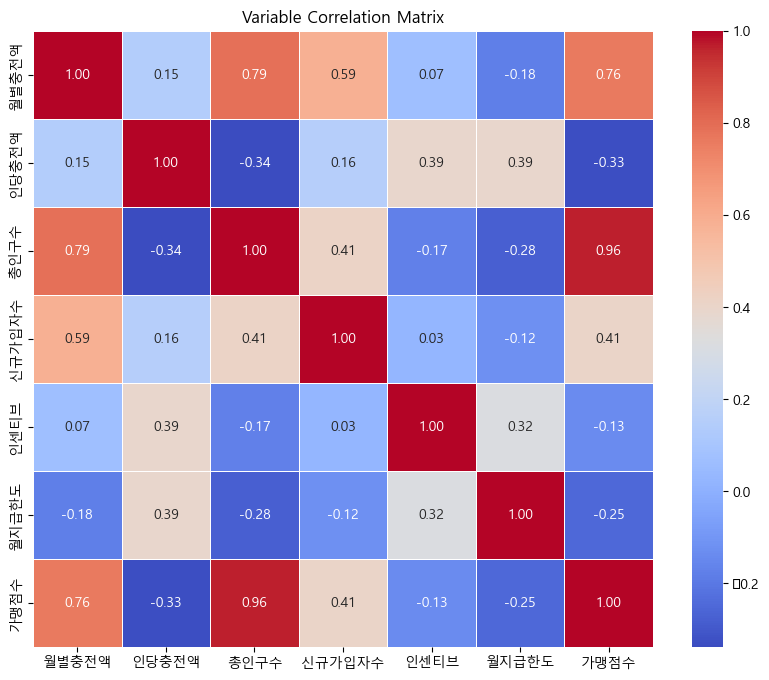

In [87]:
# 상관관계 매트릭스 생성
correlation_matrix = df_clean[['월별충전액','인당충전액','총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr('spearman')

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

#### 상관관계

인당충전액과 인센티브 ,인당충전액과 월지급한도의 상관계수는 0.39이다.

월별충전액은 총인구수와 높은 상관관계를 보인다.

가맹점수는 총인구수와 아주 높은 상관관계를 보인다.

인당충전액이 인센티브율과 월지급한도와 높은 상관관계를 보일 것으로 기대하였으나, 너무 낮은 상관관계를 보였다. 

#### 추세선 시각화


In [95]:
df_clean['시군명'].unique()

array(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시',
       '동두천시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '양주시', '양평군',
       '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시',
       '포천시', '하남시', '화성시'], dtype=object)

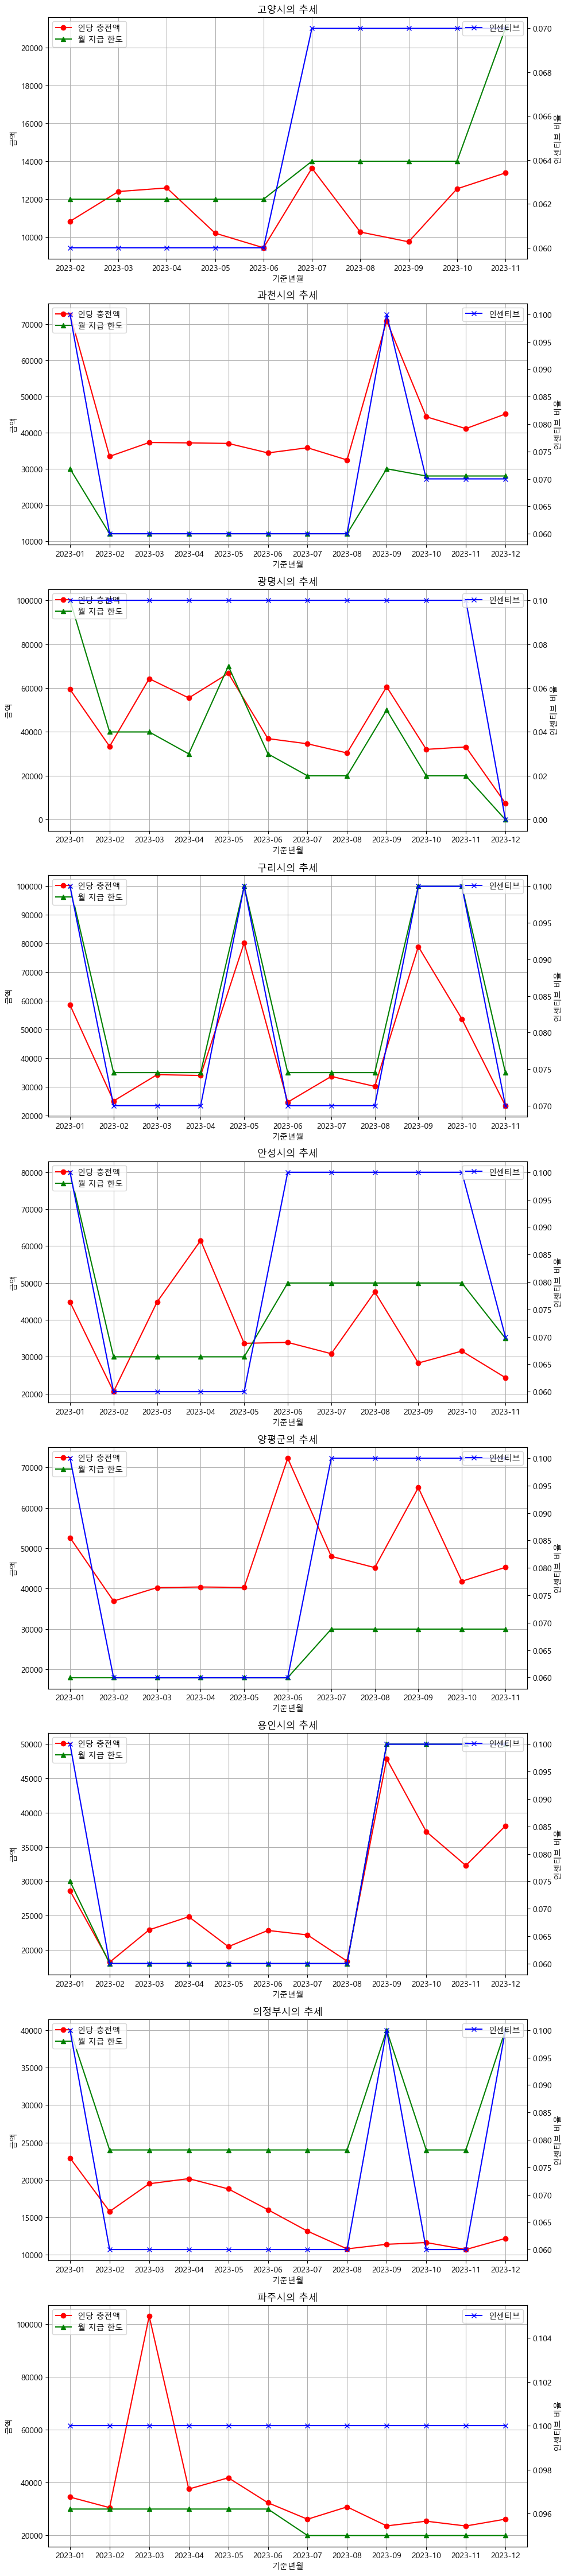

In [99]:
# 각 시군구별로 별도의 그래프 생성
unique_cities = ['고양시','과천시','광명시','구리시','안성시','양평군','용인시','의정부시', '파주시']
num_cities = len(unique_cities)
fig, axes = plt.subplots(num_cities, 1, figsize=(10, 5 * num_cities))

for i, city in enumerate(unique_cities):
    city_data = df_clean[df_clean['시군명'] == city]
    
    # 월별충전액과 월지급한도 그래프 (왼쪽 y축)
    ax = axes[i]
    ax.plot(city_data['기준년월'], city_data['인당충전액'], label='인당 충전액', marker='o', color='red')
    ax.plot(city_data['기준년월'], city_data['월지급한도'], label='월 지급 한도', marker='^', color='green')
    ax.set_title(f'{city}의 추세')
    ax.set_xlabel('기준년월')
    ax.set_ylabel('금액')
    ax.legend(loc='upper left')
    ax.grid(True)

    # 인센티브 그래프 (오른쪽 y축)
    ax_right = ax.twinx()
    ax_right.plot(city_data['기준년월'], city_data['인센티브'], label='인센티브', marker='x', color='blue')
    ax_right.set_ylabel('인센티브 비율')
    ax_right.legend(loc='upper right')

plt.tight_layout()
plt.show()

인센티브율과 지급한도를 동시에 조정하는 경우가 많았다.

인당 충전액이 인센티브율, 지급한도 변화에 맞게 움직이는 경우도 있었으나

그에 맞이 않게 움직이는 경우도 많았다.

데이터 신뢰도 문제

### 인센티브, 지급한도 효과가 잘 나타나는 지역만 고려하여 상관계수 다시 분석

In [91]:
# 고양시 과천시 광명시 광주시 구리시 군포시 김포시 남양주시 부천시 성남시 수원시 안산시 용산시 의왕시 이천시 15개 시의 데이터만을 사용
filter_loc = ['고양시','과천시','광명시','광주시','구리시','군포시','김포시','남양주시','부천시','성남시','수원시','안산시','용산시','의왕시','이천시']

df_15 = df_clean.loc[df_clean['시군명'].isin(filter_loc)]

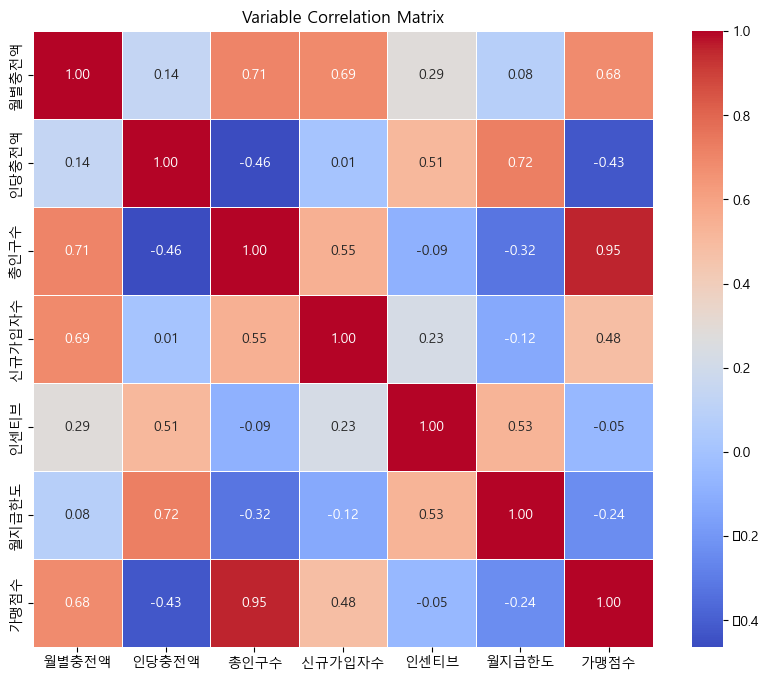

In [92]:
# 상관관계 매트릭스 생성
correlation_matrix = df_15[['월별충전액','인당충전액','총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

그럼에도 인당충전액과 인센티브의 상관계수는 0.51 밖에 나오지 않았다.

### * 한계점

In [89]:
df_clean['인센티브'].unique()

array([0.1 , 0.06, 0.07, 0.  ])

23년 적용되었던 인센티브율은 10%, 7%, 6%, 0%가 유일하였다. 여러 인센티브율이 적용된 사례가 존재하지 않아 회귀 추정이 어려운 상황이다.

가지고 있는 인센티브율 데이터에 대한 신뢰도 문제가 존재.

경기지역화폐 홈페이지의 기술된 인센티브율는 특정 주간 인센티브율 인상 이벤트, 캐시백 이벤트 등을 반영하지 않았다. 

가지고 있는 지역화폐 사용 데이터는 19-23년, 인센티브율, 지급한도 데이터는 23-24년6월이기에 23년 데이터만을 사용할 수 밖에 없었다. 

특정 시군만을 반영하여 분석하기엔 너무 부족한 데이터의 양



### * 인센티브율, 지급한도 변화가 있었던 달 확인

In [197]:
df_clean

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-01,가평군,62114,717.0,3140,3540,0.1,50000,3354,50552.210452
1,2023-02,가평군,62069,769.0,3032,3092,0.1,50000,3354,48848.861751
2,2023-03,가평군,61969,3130.0,4284,3609,0.1,500000,3354,69131.339863
3,2023-04,가평군,61915,855.0,3668,4057,0.1,500000,3354,59242.509893
4,2023-05,가평군,61836,871.0,5064,3785,0.1,500000,3354,81894.042305
...,...,...,...,...,...,...,...,...,...,...
366,2023-07,화성시,932626,8026.0,36869,36480,0.1,30000,27663,39532.459957
367,2023-08,화성시,934287,7804.0,34116,35008,0.1,30000,27663,36515.546080
368,2023-09,화성시,937189,7792.0,40559,36188,0.1,30000,27663,43277.289853
369,2023-10,화성시,939302,7667.0,37117,38199,0.1,30000,27663,39515.512583


In [198]:
# 인센티브 변화 컬럼 생성
df_clean['인센티브 변화'] = df_clean['인센티브'] - df_clean.groupby('시군명')['인센티브'].shift(1)

# 지급한도 변화 컬럼 생성
df_clean['지급한도 변화'] = df_clean['월지급한도'] - df_clean.groupby('시군명')['월지급한도'].shift(1)

# 전달대비 충전액 컬럼 생성
df_clean['전달 대비 충전액'] = df_clean['월별충전액'] - df_clean.groupby('시군명')['월별충전액'].shift(1)


# 전달대비 사용액 컬럼 생성
df_clean['전달 대비 사용액'] = df_clean['월별사용액'] - df_clean.groupby('시군명')['월별사용액'].shift(1)

df_clean = df_clean.fillna(0)
df_clean

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액,인센티브 변화,지급한도 변화,전달 대비 충전액,전달 대비 사용액
0,2023-01,가평군,62114,717.0,3140,3540,0.1,50000,3354,50552.210452,0.0,0.0,0.0,0.0
1,2023-02,가평군,62069,769.0,3032,3092,0.1,50000,3354,48848.861751,0.0,0.0,-108.0,-448.0
2,2023-03,가평군,61969,3130.0,4284,3609,0.1,500000,3354,69131.339863,0.0,450000.0,1252.0,517.0
3,2023-04,가평군,61915,855.0,3668,4057,0.1,500000,3354,59242.509893,0.0,0.0,-616.0,448.0
4,2023-05,가평군,61836,871.0,5064,3785,0.1,500000,3354,81894.042305,0.0,0.0,1396.0,-272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2023-07,화성시,932626,8026.0,36869,36480,0.1,30000,27663,39532.459957,0.0,0.0,72.0,211.0
367,2023-08,화성시,934287,7804.0,34116,35008,0.1,30000,27663,36515.546080,0.0,0.0,-2753.0,-1472.0
368,2023-09,화성시,937189,7792.0,40559,36188,0.1,30000,27663,43277.289853,0.0,0.0,6443.0,1180.0
369,2023-10,화성시,939302,7667.0,37117,38199,0.1,30000,27663,39515.512583,0.0,0.0,-3442.0,2011.0


In [186]:
df_clean[df_clean['인센티브 변화'] != 0]

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액,인센티브 변화,지급한도 변화,전달 대비 충전액,전달 대비 사용액
18,2023-07,고양시,1077156,3811.0,14686,11992,0.07,14000,26672,13634.051150,0.01,2000.0,4511.0,278.0
25,2023-02,과천시,78526,819.0,2626,3594,0.06,12000,1674,33441.153249,-0.04,-18000.0,-3078.0,-603.0
32,2023-09,과천시,81332,1123.0,5776,3535,0.10,30000,1674,71017.557665,0.04,18000.0,3138.0,764.0
33,2023-10,과천시,81143,740.0,3604,3738,0.07,28000,1674,44415.414762,-0.03,-2000.0,-2172.0,203.0
47,2023-12,광명시,280197,1474.0,2100,5453,0.00,0,7835,7494.726924,-0.10,-20000.0,-7198.0,-4445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2023-09,포천시,143880,972.0,2832,1978,0.10,40000,6566,19683.069224,0.04,16000.0,-1340.0,176.0
349,2023-02,하남시,326704,2752.0,10200,19231,0.06,12000,9206,31220.921691,-0.04,-8000.0,-4606.0,6342.0
356,2023-09,하남시,329559,3388.0,12991,11833,0.10,20000,9206,39419.345246,0.04,8000.0,3549.0,2902.0
357,2023-10,하남시,329559,2456.0,12682,11979,0.06,24000,9206,38481.728613,-0.04,4000.0,-309.0,146.0


In [187]:
df_clean[df_clean['지급한도 변화'] != 0]

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액,인센티브 변화,지급한도 변화,전달 대비 충전액,전달 대비 사용액
2,2023-03,가평군,61969,3130.0,4284,3609,0.10,500000,3354,69131.339863,0.00,450000.0,1252.0,517.0
6,2023-07,가평군,61744,580.0,2682,2536,0.10,600000,3354,43437.419020,0.00,100000.0,-1515.0,-1507.0
8,2023-09,가평군,61976,782.0,3113,2376,0.10,60000,3354,50229.120950,0.00,-540000.0,-518.0,-16.0
18,2023-07,고양시,1077156,3811.0,14686,11992,0.07,14000,26672,13634.051150,0.01,2000.0,4511.0,278.0
22,2023-11,고양시,1075089,3247.0,14389,12450,0.07,21000,26672,13384.008208,0.00,7000.0,890.0,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2023-09,포천시,143880,972.0,2832,1978,0.10,40000,6566,19683.069224,0.04,16000.0,-1340.0,176.0
349,2023-02,하남시,326704,2752.0,10200,19231,0.06,12000,9206,31220.921691,-0.04,-8000.0,-4606.0,6342.0
356,2023-09,하남시,329559,3388.0,12991,11833,0.10,20000,9206,39419.345246,0.04,8000.0,3549.0,2902.0
357,2023-10,하남시,329559,2456.0,12682,11979,0.06,24000,9206,38481.728613,-0.04,4000.0,-309.0,146.0


In [188]:
df_clean[(df_clean['인센티브 변화'] != 0) | (df_clean['지급한도 변화'] != 0)]

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액,인센티브 변화,지급한도 변화,전달 대비 충전액,전달 대비 사용액
2,2023-03,가평군,61969,3130.0,4284,3609,0.10,500000,3354,69131.339863,0.00,450000.0,1252.0,517.0
6,2023-07,가평군,61744,580.0,2682,2536,0.10,600000,3354,43437.419020,0.00,100000.0,-1515.0,-1507.0
8,2023-09,가평군,61976,782.0,3113,2376,0.10,60000,3354,50229.120950,0.00,-540000.0,-518.0,-16.0
18,2023-07,고양시,1077156,3811.0,14686,11992,0.07,14000,26672,13634.051150,0.01,2000.0,4511.0,278.0
22,2023-11,고양시,1075089,3247.0,14389,12450,0.07,21000,26672,13384.008208,0.00,7000.0,890.0,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2023-09,포천시,143880,972.0,2832,1978,0.10,40000,6566,19683.069224,0.04,16000.0,-1340.0,176.0
349,2023-02,하남시,326704,2752.0,10200,19231,0.06,12000,9206,31220.921691,-0.04,-8000.0,-4606.0,6342.0
356,2023-09,하남시,329559,3388.0,12991,11833,0.10,20000,9206,39419.345246,0.04,8000.0,3549.0,2902.0
357,2023-10,하남시,329559,2456.0,12682,11979,0.06,24000,9206,38481.728613,-0.04,4000.0,-309.0,146.0


In [199]:
# 인센티브 변화 형태 변화
df_clean['인센티브 변화'] = df_clean['인센티브 변화'] * 100
df_clean['인센티브 변화'] = df_clean['인센티브 변화'].astype(int)

df_clean['인센티브 변화'].unique()

array([  0,   1,  -4,   4,  -3, -10,   3,  -1])

In [200]:
## 인센티브율 변화가 있었던 달만 필터링
incen = df_clean[df_clean['인센티브 변화'] != 0]

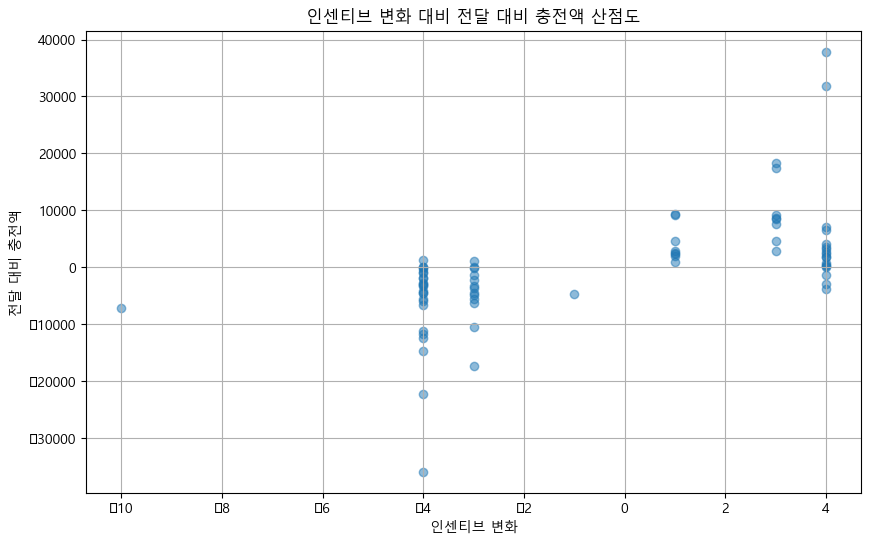

In [201]:
plt.figure(figsize=(10, 6))
plt.scatter(incen['인센티브 변화'], incen['전달 대비 충전액'], alpha=0.5)
plt.title('인센티브 변화 대비 전달 대비 충전액 산점도')
plt.xlabel('인센티브 변화')
plt.ylabel('전달 대비 충전액')
plt.grid(True)
plt.show()

In [202]:
incen[['인센티브 변화','전달 대비 충전액']].groupby('인센티브 변화').mean()

,전달 대비 충전액
인센티브 변화,
-10,-7198.000000
-4,-6537.250000
-3,-4513.538462
-1,-4632.000000
1,4192.875000
3,9616.250000
4,5332.444444


In [203]:
incen[['인센티브 변화','전달 대비 충전액']].groupby('인센티브 변화').count()

,전달 대비 충전액
인센티브 변화,
-10,1
-4,24
-3,13
-1,1
1,8
3,8
4,18


인센티브 변화나 지급한도 변화를 확인하기에는 표본의 수가 너무 적다.

## * 가입자수 기준

가입자수 기준으로 할 경우 단순 인구수 차이의 영향을 덜 받을 것으로 기대된다. 


In [101]:
## 지역화폐 발행 및 이용현황(23년)
use_23 = pd.read_csv('../data/경기도/원본/지역화폐발행및이용현황.csv',encoding='cp949')
use_23

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,4051,2140
1,가평군,2023-11,458.0,2368,2187
2,가평군,2023-10,555.0,2596,2335
3,가평군,2023-09,782.0,3113,2376
4,가평군,2023-08,473.0,3631,2392
...,...,...,...,...,...
367,화성시,2023-05,6717.0,35058,37413
368,화성시,2023-04,8440.0,35557,35525
369,화성시,2023-03,9111.0,35906,36982
370,화성시,2023-02,7829.0,30162,33325


In [104]:
## 지역화폐 발행 및 이용현황(19-22년)
use_19to22 = pd.read_excel('../data/경기도/원본/지역화폐발행및이용현황(2019~2022).xlsx')
use_19to22

,시군명,기준년월,월별신규가입자수(명),월별충전액(천원),월별사용액(천원)
0,가평군,2022-12-01,814.0,3600881.0,3996840.0
1,가평군,2022-11-01,701.0,4356413.0,3673972.0
2,가평군,2022-10-01,657.0,3205893.0,3586395.0
3,가평군,2022-09-01,832.0,4334836.0,3773560.0
4,가평군,2022-08-01,858.0,3091351.0,3600543.0
...,...,...,...,...,...
1483,화성시,2019-05-01,10661.0,4449088.0,1392631.0
1484,화성시,2019-04-01,4826.0,1476982.0,204210.0
1485,화성시,2019-03-01,NaN,NaN,NaN
1486,화성시,2019-02-01,NaN,NaN,NaN


In [105]:
# df2 '기준년월' 형태 맞춰주기
use_19to22['기준년월'] = use_19to22['기준년월'].map(lambda x : x.strftime('%Y-%m'))

# 결측치 0으로 처리 (2019년 초반 지역화폐를 발행하지 않는 지역은 Na로 되어있다.)
use_19to22 = use_19to22.fillna(0)

# 충전액, 사용액 백만원 단위로 맞추기
use_19to22['월별충전액(천원)'] = use_19to22['월별충전액(천원)'] / 1000
use_19to22['월별사용액(천원)'] = use_19to22['월별사용액(천원)'] / 1000

# 컬럼명 바꾸기
use_19to22.columns = ['시군명', '기준년월', '월별신규가입자수(명)', '월별충전액(백만원)', '월별사용액(백만원)']
use_19to22

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2022-12,814.0,3600.881,3996.840
1,가평군,2022-11,701.0,4356.413,3673.972
2,가평군,2022-10,657.0,3205.893,3586.395
3,가평군,2022-09,832.0,4334.836,3773.560
4,가평군,2022-08,858.0,3091.351,3600.543
...,...,...,...,...,...
1483,화성시,2019-05,10661.0,4449.088,1392.631
1484,화성시,2019-04,4826.0,1476.982,204.210
1485,화성시,2019-03,0.0,0.000,0.000
1486,화성시,2019-02,0.0,0.000,0.000


In [106]:
# 데이터 결합
use_total = pd.concat([use_23, use_19to22])
use_total

,시군명,기준년월,월별신규가입자수(명),월별충전액(백만원),월별사용액(백만원)
0,가평군,2023-12,484.0,4051.000,2140.000
1,가평군,2023-11,458.0,2368.000,2187.000
2,가평군,2023-10,555.0,2596.000,2335.000
3,가평군,2023-09,782.0,3113.000,2376.000
4,가평군,2023-08,473.0,3631.000,2392.000
...,...,...,...,...,...
1483,화성시,2019-05,10661.0,4449.088,1392.631
1484,화성시,2019-04,4826.0,1476.982,204.210
1485,화성시,2019-03,0.0,0.000,0.000
1486,화성시,2019-02,0.0,0.000,0.000


In [107]:
use_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1860 entries, 0 to 1487
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군명          1860 non-null   object 
 1   기준년월         1860 non-null   object 
 2   월별신규가입자수(명)  1858 non-null   float64
 3   월별충전액(백만원)   1860 non-null   float64
 4   월별사용액(백만원)   1860 non-null   float64
dtypes: float64(3), object(2)
memory usage: 87.2+ KB


In [108]:
# 신규가입자수 na인 두 행 제거
use_total = use_total.loc[use_total['월별신규가입자수(명)'].notna()]

#use_ 데이터 int형태로 변환
use_total['월별충전액(백만원)'] = use_total['월별충전액(백만원)'].map(lambda x : int(x))
use_total['월별사용액(백만원)'] = use_total['월별사용액(백만원)'].map(lambda x : int(x))
use_total['월별신규가입자수(명)'] = use_total['월별신규가입자수(명)'].map(lambda x : int(x))

# 컬럼명 변경
use_total.columns = ['시군명','기준년월','신규가입자수','충전액','사용액']

# 정렬
use_total = use_total.sort_values(['시군명','기준년월'])
use_total.reset_index(drop=True,inplace=True)
use_total

,시군명,기준년월,신규가입자수,충전액,사용액
0,가평군,2019-01,0,0,0
1,가평군,2019-02,0,0,0
2,가평군,2019-03,1,0,0
3,가평군,2019-04,87,8,2
4,가평군,2019-05,506,109,59
...,...,...,...,...,...
1853,화성시,2023-08,7804,34116,35008
1854,화성시,2023-09,7792,40559,36188
1855,화성시,2023-10,7667,37117,38199
1856,화성시,2023-11,6808,34953,32898


In [109]:
# 시군별 누적가입자수, 가입자수 대비 충전액, 사용액 컬럼 생성
# 시군별로 그룹화 후 누적가입자수 계산
use_total['누적가입자수'] = use_total.groupby('시군명')['신규가입자수'].cumsum()

# 누적가입자수 대비 충전액, 사용액 계산
use_total['누적가입자수 대비 충전액'] = use_total.apply(lambda x: x['충전액'] / x['누적가입자수'] if x['누적가입자수'] != 0 else 0, axis=1)
use_total['누적가입자수 대비 사용액'] = use_total.apply(lambda x: x['사용액'] / x['누적가입자수'] if x['누적가입자수'] != 0 else 0, axis=1)

# 누적가입자수 대비 충전액, 사용액 (원 단위)
use_total['누적가입자수 대비 사용액'] = use_total['누적가입자수 대비 사용액'] * 1000000
use_total['누적가입자수 대비 충전액'] = use_total['누적가입자수 대비 충전액'] * 1000000

# 컬럼명 변경
use_total.rename(columns={'누적가입자수 대비 충전액':'인당충전액','누적가입자수 대비 사용액' : '인당사용액'},inplace=True)

use_total

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,인당충전액,인당사용액
0,가평군,2019-01,0,0,0,0,0.000000,0.000000
1,가평군,2019-02,0,0,0,0,0.000000,0.000000
2,가평군,2019-03,1,0,0,1,0.000000,0.000000
3,가평군,2019-04,87,8,2,88,90909.090909,22727.272727
4,가평군,2019-05,506,109,59,594,183501.683502,99326.599327
...,...,...,...,...,...,...,...,...
1853,화성시,2023-08,7804,34116,35008,755488,45157.567030,46338.260833
1854,화성시,2023-09,7792,40559,36188,763280,53137.773818,47411.172833
1855,화성시,2023-10,7667,37117,38199,770947,48144.684395,49548.153116
1856,화성시,2023-11,6808,34953,32898,777755,44940.887555,42298.667318


In [115]:
# 전달 대비 충전액, 사용액 컬럼 생성
# 시군별로 그룹화 후 이전 달 충전액, 사용액을 현재 행으로 이동
use_total['전달 충전액'] = use_total.groupby('시군명')['충전액'].shift(1)
use_total['전달 사용액'] = use_total.groupby('시군명')['사용액'].shift(1)

# 전달 대비 충전액, 사용액의 변화 계산
use_total['전달 대비 충전액'] = use_total['충전액'] - use_total['전달 충전액']
use_total['전달 대비 사용액'] = use_total['사용액'] - use_total['전달 사용액']

# 2019년 1월 결측치 처리
use_total = use_total.fillna(0)

# 필요없는 컬럼 제거
use_total.drop(['전달 충전액', '전달 사용액'], axis=1 , inplace=True)

# int 현태로 변환
use_total['인당충전액'] = use_total['인당충전액'].map(lambda x : int(x))
use_total['인당사용액'] = use_total['인당사용액'].map(lambda x : int(x))
use_total['전달 대비 충전액'] = use_total['전달 대비 충전액'].map(lambda x : int(x))
use_total['전달 대비 사용액'] = use_total['전달 대비 사용액'].map(lambda x : int(x))

# 결과 확인
use_total


,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,인당충전액,인당사용액,전달 대비 충전액,전달 대비 사용액
0,가평군,2019-01,0,0,0,0,0,0,0,0
1,가평군,2019-02,0,0,0,0,0,0,0,0
2,가평군,2019-03,1,0,0,1,0,0,0,0
3,가평군,2019-04,87,8,2,88,90909,22727,8,2
4,가평군,2019-05,506,109,59,594,183501,99326,101,57
...,...,...,...,...,...,...,...,...,...,...
1853,화성시,2023-08,7804,34116,35008,755488,45157,46338,-2753,-1472
1854,화성시,2023-09,7792,40559,36188,763280,53137,47411,6443,1180
1855,화성시,2023-10,7667,37117,38199,770947,48144,49548,-3442,2011
1856,화성시,2023-11,6808,34953,32898,777755,44940,42298,-2164,-5301


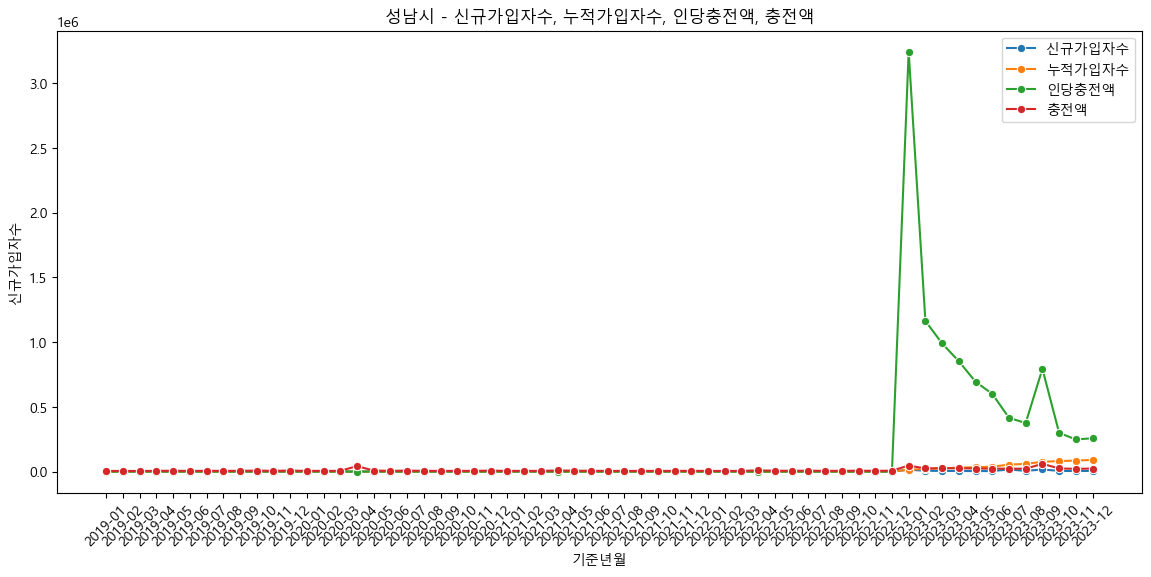

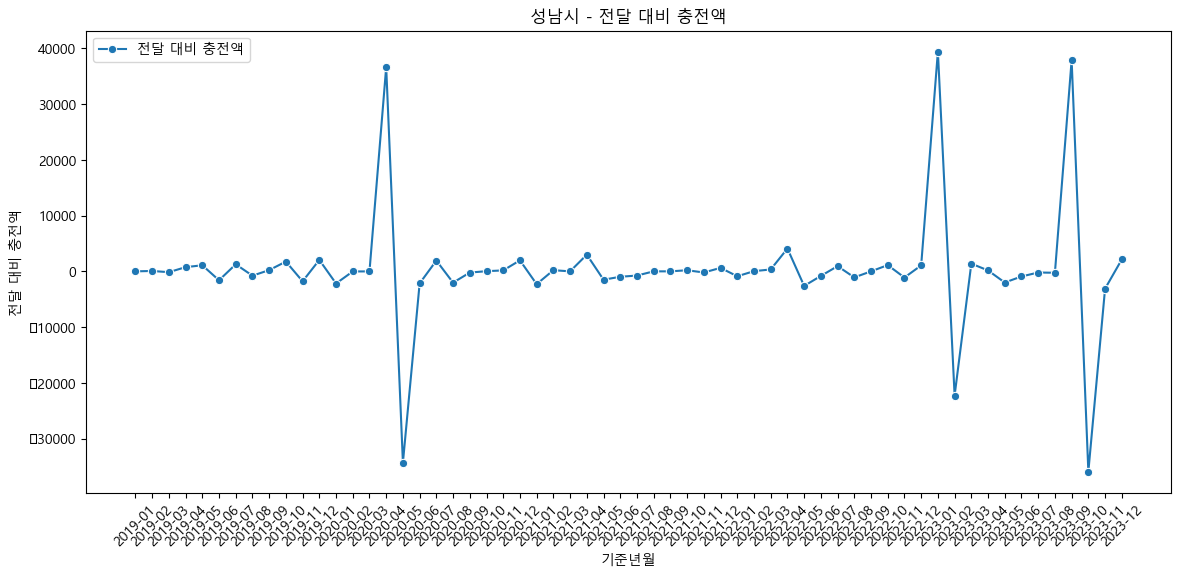

In [120]:
# 고유한 시군명 리스트
city_names = ['성남시']

# 시각화
for city in city_names:
    city_data = use_total[use_total['시군명'] == city]

    # 첫 번째 그래프: 신규가입자수, 누적가입자수, 인당 충전액, 충전액
    plt.figure(figsize=(14, 6))
    plt.title(f'{city} - 신규가입자수, 누적가입자수, 인당충전액, 충전액')
    sns.lineplot(x='기준년월', y='신규가입자수', data=city_data, marker='o', label='신규가입자수')
    sns.lineplot(x='기준년월', y='누적가입자수', data=city_data, marker='o', label='누적가입자수')
    sns.lineplot(x='기준년월', y='인당충전액', data=city_data, marker='o', label='인당충전액')
    sns.lineplot(x='기준년월', y='충전액', data=city_data, marker='o', label='충전액')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # 두 번째 그래프: 전달 대비 충전액
    plt.figure(figsize=(14, 6))
    plt.title(f'{city} - 전달 대비 충전액')
    sns.lineplot(x='기준년월', y='전달 대비 충전액', data=city_data, marker='o', label='전달 대비 충전액')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [121]:
use_total.loc[use_total['시군명'] == '성남시']

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,인당충전액,인당사용액,전달 대비 충전액,전달 대비 사용액
658,성남시,2019-01,0,4792,3963,0,0,0,0,0
659,성남시,2019-02,0,4861,3557,0,0,0,69,-406
660,성남시,2019-03,0,4712,4796,0,0,0,-149,1239
661,성남시,2019-04,0,5464,4407,0,0,0,752,-389
662,성남시,2019-05,0,6557,5392,0,0,0,1093,985
663,성남시,2019-06,0,4957,4948,0,0,0,-1600,-444
664,성남시,2019-07,0,6224,5186,0,0,0,1267,238
665,성남시,2019-08,0,5447,5798,0,0,0,-777,612
666,성남시,2019-09,0,5669,4431,0,0,0,222,-1367
667,성남시,2019-10,0,7422,6070,0,0,0,1753,1639


In [122]:
use_total.loc[use_total['시군명'] == '김포시'].head(8)

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,인당충전액,인당사용액,전달 대비 충전액,전달 대비 사용액
420,김포시,2019-01,0,0,0,0,0,0,0,0
421,김포시,2019-02,0,0,0,0,0,0,0,0
422,김포시,2019-03,0,0,0,0,0,0,0,0
423,김포시,2019-04,0,0,0,0,0,0,0,0
424,김포시,2019-05,0,0,0,0,0,0,0,0
425,김포시,2019-06,0,0,0,0,0,0,0,0
426,김포시,2019-07,0,0,0,0,0,0,0,0
427,김포시,2019-08,0,0,0,0,0,0,0,0


김포시, 성남시, 시흥시 2023년 이전 신규가입자수, 충전액, 사용액이 제대로 입력되어 있지 않았다.

교훈 : 원본데이터 상태를 잘 확인하자.

김포시, 성남시, 시흥시, 고양시를 제외한 시군으로 2023년 분석

In [146]:
# use_total에서 2023년 데이터만 추출
df_가입자 = use_total[use_total['기준년월'].str.startswith('2023')]

# 컬럼명 변경
df_가입자.rename(columns={'인당충전액':'가입자수당충전액', '인당사용액' : '가입자수당사용액'},inplace=True)

# 김포시, 성남시, 시흥시 제외
df_가입자 = df_가입자[~df_가입자['시군명'].isin(['김포시','성남시','시흥시'])]
df_가입자

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,가입자수당충전액,가입자수당사용액,전달 대비 충전액,전달 대비 사용액
48,가평군,2023-01,717,3140,3540,39987,78525,88528,-460,-456
49,가평군,2023-02,769,3032,3092,40756,74393,75866,-108,-448
50,가평군,2023-03,3130,4284,3609,43886,97616,82235,1252,517
51,가평군,2023-04,855,3668,4057,44741,81982,90677,-616,448
52,가평군,2023-05,871,5064,3785,45612,111023,82982,1396,-272
...,...,...,...,...,...,...,...,...,...,...
1853,화성시,2023-08,7804,34116,35008,755488,45157,46338,-2753,-1472
1854,화성시,2023-09,7792,40559,36188,763280,53137,47411,6443,1180
1855,화성시,2023-10,7667,37117,38199,770947,48144,49548,-3442,2011
1856,화성시,2023-11,6808,34953,32898,777755,44940,42298,-2164,-5301


In [139]:
# df_clean
df_인구수 = df_clean[['기준년월', '시군명','총인구수','인센티브','월지급한도','가맹점수','인당충전액']]
df_인구수.rename(columns={'인당충전액':'인구수당충전액'},inplace=True)
df_인구수['인구수당충전액'] = df_인구수['인구수당충전액'].map(lambda x : int(x))
df_인구수

,기준년월,시군명,총인구수,인센티브,월지급한도,가맹점수,인구수당충전액
0,2023-01,가평군,62114,0.1,50000,3354,50552
1,2023-02,가평군,62069,0.1,50000,3354,48848
2,2023-03,가평군,61969,0.1,500000,3354,69131
3,2023-04,가평군,61915,0.1,500000,3354,59242
4,2023-05,가평군,61836,0.1,500000,3354,81894
...,...,...,...,...,...,...,...
366,2023-07,화성시,932626,0.1,30000,27663,39532
367,2023-08,화성시,934287,0.1,30000,27663,36515
368,2023-09,화성시,937189,0.1,30000,27663,43277
369,2023-10,화성시,939302,0.1,30000,27663,39515


In [148]:
df_new_2023 = pd.merge(df_가입자, df_인구수, how='inner', on=['시군명', '기준년월'])
df_new_2023

,시군명,기준년월,신규가입자수,충전액,사용액,누적가입자수,가입자수당충전액,가입자수당사용액,전달 대비 충전액,전달 대비 사용액,총인구수,인센티브,월지급한도,가맹점수,인구수당충전액
0,가평군,2023-01,717,3140,3540,39987,78525,88528,-460,-456,62114,0.1,50000,3354,50552
1,가평군,2023-02,769,3032,3092,40756,74393,75866,-108,-448,62069,0.1,50000,3354,48848
2,가평군,2023-03,3130,4284,3609,43886,97616,82235,1252,517,61969,0.1,500000,3354,69131
3,가평군,2023-04,855,3668,4057,44741,81982,90677,-616,448,61915,0.1,500000,3354,59242
4,가평군,2023-05,871,5064,3785,45612,111023,82982,1396,-272,61836,0.1,500000,3354,81894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,화성시,2023-07,8026,36869,36480,747684,49310,48790,72,211,932626,0.1,30000,27663,39532
305,화성시,2023-08,7804,34116,35008,755488,45157,46338,-2753,-1472,934287,0.1,30000,27663,36515
306,화성시,2023-09,7792,40559,36188,763280,53137,47411,6443,1180,937189,0.1,30000,27663,43277
307,화성시,2023-10,7667,37117,38199,770947,48144,49548,-3442,2011,939302,0.1,30000,27663,39515


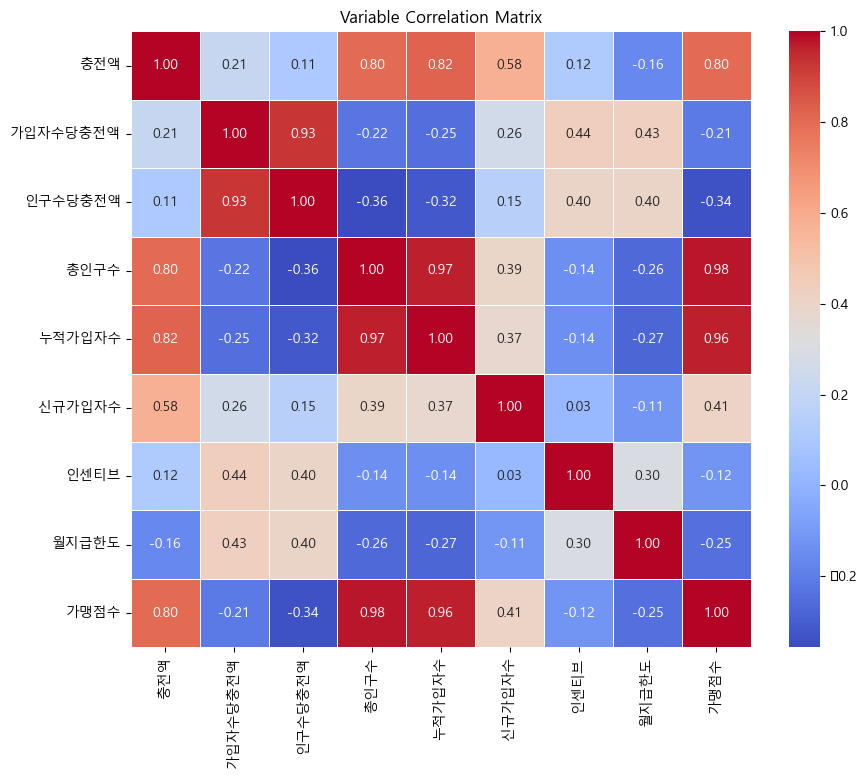

In [159]:
# 상관관계 매트릭스 생성
correlation_matrix = df_new_2023[['충전액','가입자수당충전액','인구수당충전액','총인구수','누적가입자수','신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

### 시각화

![가입자포함 2023 지역화폐-2.png](<attachment:가입자포함 2023 지역화폐-2.png>)

![가입자포함 2023 지역화폐2.png](<attachment:가입자포함 2023 지역화폐2.png>)
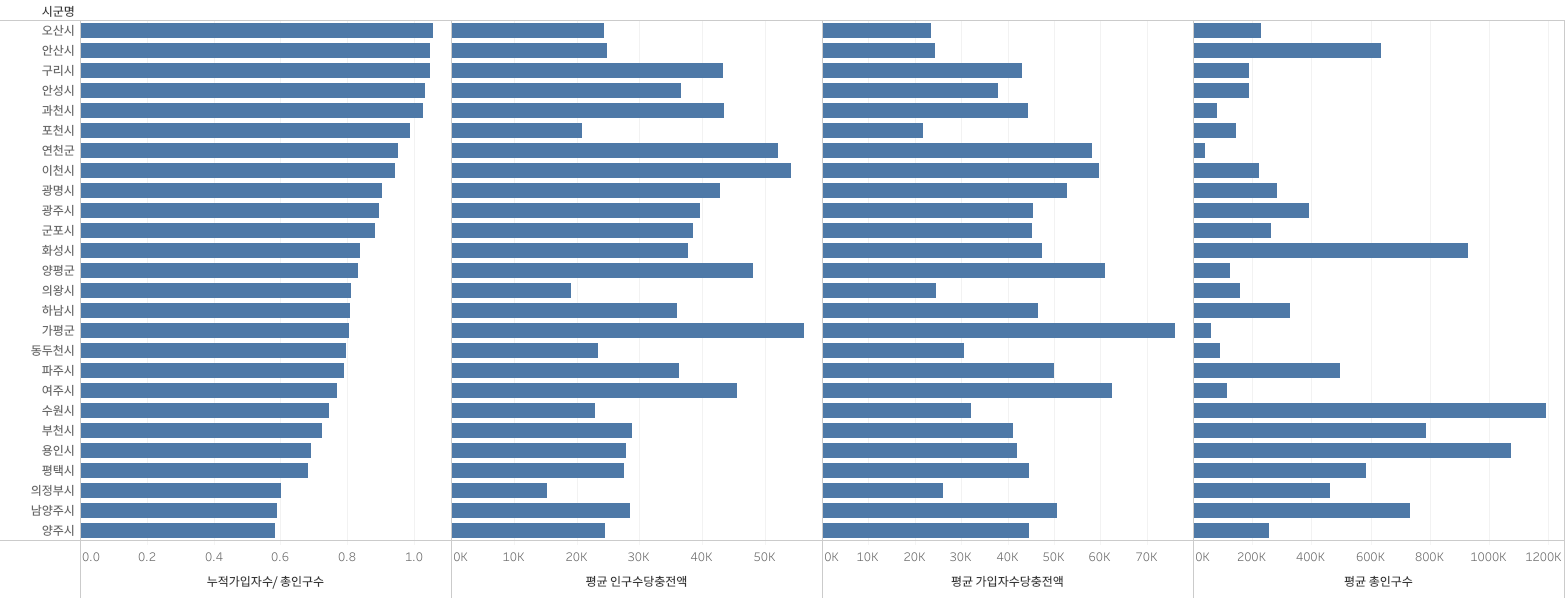
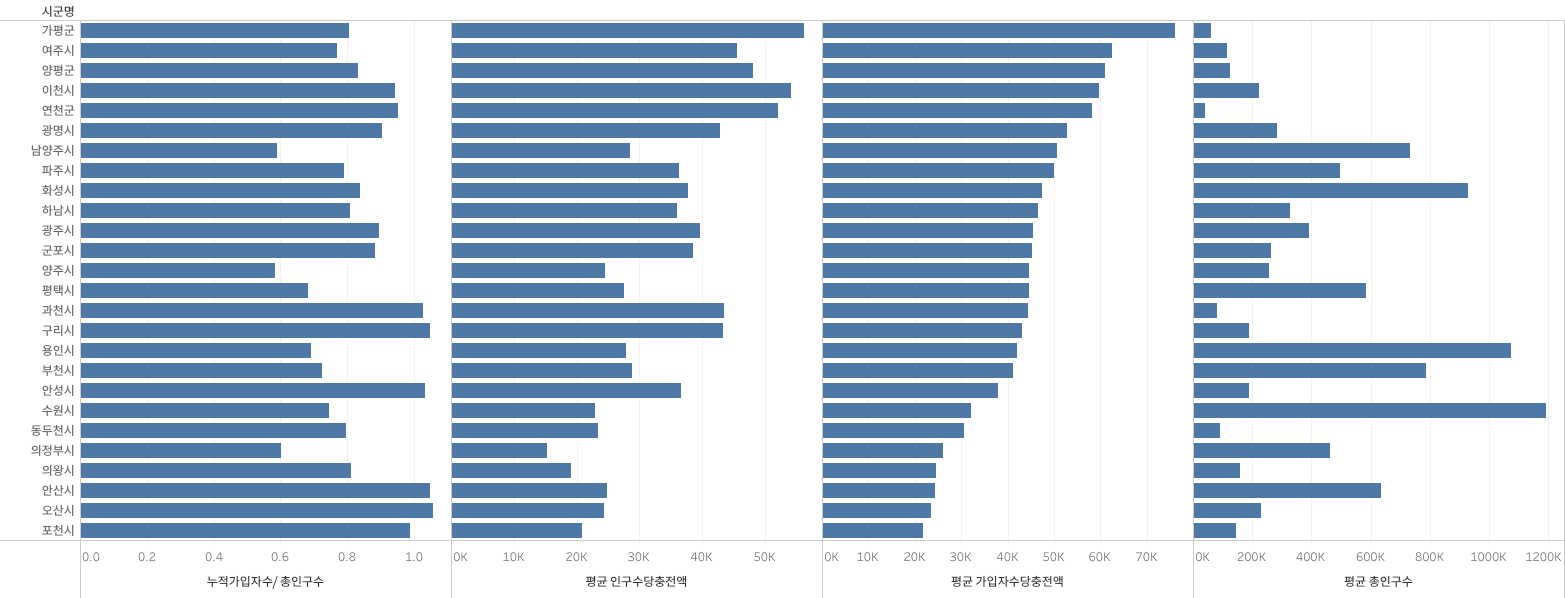

누적가입자수/총인구수도 '평균충전액', '평균사용액'과 상관관계를 보이지 못한다. (충전액, 사용액 둘 다 총인구수와 높은 상관관계)

'가입자수당 충전액'과 '인구수당 충전액'은 0.93으로 높은 상관관계를 보였다. 

가입자수 기준으로 하더라도 유의미한 지표를 보이지 못하였다. 

우리가 가지고 있는 데이터로 적정 인센티브율과 적정 지급한도를 예측하는 모델을 구축하는 것은 불가능하다. 

실제 여러 논문에서도 머신러닝을 통해 이를 제시하는 사례가 거의 없는 것으로 보인다. 대부분 설문기반 실험 방식을 채택하였다.

직접 설문 조사를 하기에는 시간적 한계가 있어, '경기지역화폐 운영제도 개선방안 연구'에서 진행한 설문을 토대로 적정 캐시백율과 적정 지급한도를 선정할 예정이다. 


## * 지역화폐 혜택 3가지 지급 방식
1. 할인형(구매 시)

2. 추가지급형(구매 시)

3. 캐시백형(사용 시)

현재 경기도에서는 할인형과 추가지급형을 사용하고 있다. 

경기도 지역화폐를 통합할 경우 구매 시 혜택이 지급되는 할인형과 추가지급형은 경기도 모든 시군에 동일한 인센티브율이 적용된다.

그러나 캐시백형의 경우 사용 가맹점을 기준으로 산정할 수 있기 때문에 시군마다 차등 캐시백율을 적용할 수 있다. 

캐시백형을 적용할 경우 예산 부족의 문제, 지역 불균형의 문제를 비교적 해결할 수 있을 것으로 생각된다.



##  * 차등 캐시백율

통합 지역화폐에서 동일한 인센티브율을 적용할 경우, 특정 지역에만 소비가 몰리는 지역 불균형의 문제가 발생할 수 있다.

이를 방지하기 위하여 경기도 시군을 5개 단계로 구분하여 차등 캐시백율을 적용한다.

단계 구분을 위한 기준 선정이 필요.


- 인구 

- 경제지표

- 지역화폐 활성화

## * 인구



#### - 인구소멸

현재 각 시군별 지역화폐 예산에서 정부 지원이 차지하는 비중은 지역의 인구소멸 위험지수에 따라 다르다.

인구소멸 위험지수 : 만 20~39세 여성 인구 수 ÷ 만 65세 이상 고령 인구 수

10% 인센티브율을 보장한다고 하였을 때 정부 지원이 차지하는 비중은 일반적인 지역 2%p, 인구소멸 위험지역 5%p이다.

22년 기준 인구소멸 위험지역으로 분류되어있는 지역은 연천군, 가평군, 양평군, 여주시, 포천시, 동두천시

이 지역들은 인구수 순위에서도 가장 아래에 있는 지역들이다. 

또한 경기도의 인구소멸 위험지수가 최근 몇년 사이에 급격히 나빠지고 있는 지역이다.

따라서 인구소멸 지역도 차등 캐시백율 기준으로 선정.


#### - 인구수 


지역화폐 사용량에 가장 지대하게 영향을 끼치는 것은 단연 인구수이다. 

인구수가 많은 지역에 가맹점도 많고 사용량도 많다. 

인구수가 적은 지역은 지역 외 유출 비율이 높다.

지역화폐를 통합하게 된다면 인구수가 많은 지역에서 지역화폐가 훨씬 더 많이 사용될 것이 우려된다.

인구수에 대한 차등이 존재하지 않는다면 지역 불균형은 심화될 것이다.

따라서 인구수도 차등 캐시백율 기준으로 선정.








#### 인구수가 적은 지역은 지역 외 유출 비율이 높다.


1. '수원시', '고양시', '용인시', '화성시', '성남시', '부천시'
2. '남양주시', '안산시', '평택시', '안양시', '시흥시', '파주시'
3. '김포시', '의정부시', '광주시', '하남시', '광명시', '군포시'
4. '양주시', '오산시', '이천시', '안성시', '구리시', '의왕시'
5. '포천시', '양평군', '여주시', '동두천시', '과천시', '가평군', '연천군'

In [83]:
total_move

,출발지코드,도착지코드,종합 유입인구
0,가평군,가평군,57201.137500
1,가평군,고양시,211.448333
2,가평군,과천시,15.983333
3,가평군,광명시,34.633333
4,가평군,광주시,100.250833
...,...,...,...
987,화성시,파주시,775.716667
988,화성시,평택시,13643.793333
989,화성시,포천시,453.536667
990,화성시,하남시,776.471667


In [84]:
# 경기도 내 지역
total_move2 = total_move[total_move['출발지코드'] != '경기도외']
total_move2

,출발지코드,도착지코드,종합 유입인구
0,가평군,가평군,57201.137500
1,가평군,고양시,211.448333
2,가평군,과천시,15.983333
3,가평군,광명시,34.633333
4,가평군,광주시,100.250833
...,...,...,...
987,화성시,파주시,775.716667
988,화성시,평택시,13643.793333
989,화성시,포천시,453.536667
990,화성시,하남시,776.471667


In [ ]:
# 경기도 지역 리스트
gyeonggi_cities = {
    '수원시': 1, '고양시': 1, '용인시': 1, '화성시': 1, '성남시': 1, '부천시': 1,
    '남양주시': 2, '안산시': 2, '평택시': 2, '안양시': 2, '시흥시': 2, '파주시': 2,
    '김포시': 3, '의정부시': 3, '광주시': 3, '하남시': 3, '광명시': 3, '군포시': 3,
    '양주시': 4, '오산시': 4, '이천시': 4, '안성시': 4, '구리시': 4, '의왕시': 4,
    '포천시': 5, '양평군': 5, '여주시': 5, '동두천시': 5, '과천시': 5, '가평군': 5, '연천군': 5
}

# '출발지단계' 컬럼 생성
total_move2['출발지단계'] = total_move2['출발지코드'].map(gyeonggi_cities)

# '도착지 단계' 컬럼 생성
total_move2['도착지단계'] = total_move2['도착지코드'].map(gyeonggi_cities)

# 결과 확인
total_move2

,출발지코드,도착지코드,종합 유입인구,출발지단계,도착지단계
0,가평군,가평군,57201.137500,5,5
1,가평군,고양시,211.448333,5,1
2,가평군,과천시,15.983333,5,5
3,가평군,광명시,34.633333,5,3
4,가평군,광주시,100.250833,5,3
...,...,...,...,...,...
987,화성시,파주시,775.716667,1,2
988,화성시,평택시,13643.793333,1,2
989,화성시,포천시,453.536667,1,5
990,화성시,하남시,776.471667,1,3


In [ ]:
# 출발지단계와 도착지단계를 그룹화하여 평균 종합 유입인구를 계산
grouped_data = total_move2.groupby(['출발지단계', '도착지단계'])['종합 유입인구'].mean().reset_index()

# 결과를 표로 만들기
grouped_data.pivot_table(index='출발지단계', columns='도착지단계', values='종합 유입인구', fill_value=0)

도착지단계,1,2,3,4,5
출발지단계,,,,,
1,167227.715648,5790.163819,3460.212176,2700.093380,955.472302
2,6110.579606,92446.936736,2573.365602,2727.429861,1061.809802
3,3762.413148,2663.038264,52403.554167,1419.355463,892.257500
4,2624.279421,2981.919838,1251.869120,31797.279282,805.691746
5,355.014008,517.623790,499.302143,703.581270,13063.692976


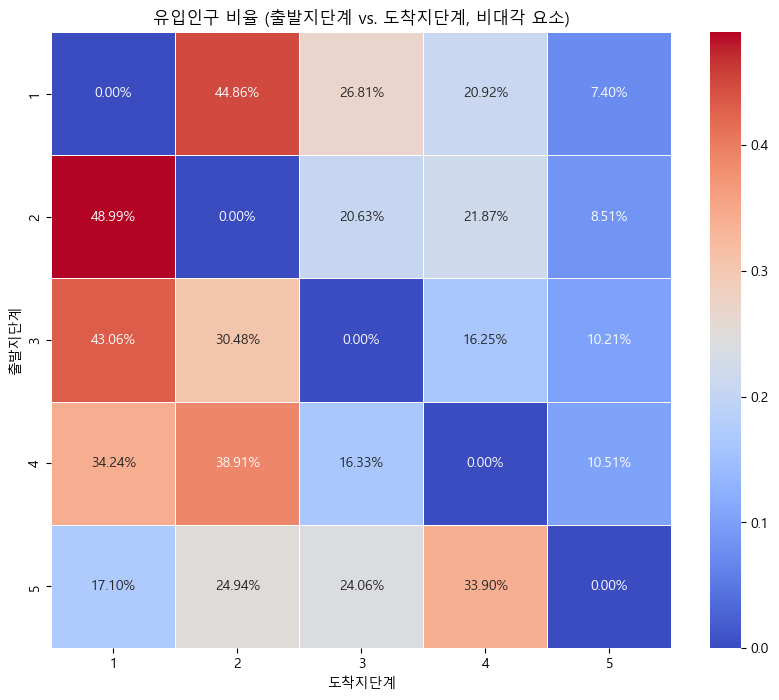

In [ ]:
# 대각선(출발지단계와 도착지단계가 같은 경우) 제거
non_diagonal_data = grouped_data[grouped_data['출발지단계'] != grouped_data['도착지단계']]

# 피벗 테이블 생성
pivot_table = non_diagonal_data.pivot_table(index='출발지단계', columns='도착지단계', values='종합 유입인구', fill_value=0)

# 각 출발지 단계에서 모든 도착지 단계로의 유입인구 총합 계산
total_inflow_by_departure = pivot_table.sum(axis=1)

# 비율 계산을 위해 각 셀 값을 해당 출발지 단계의 총 유입인구로 나눔
ratio_table = pivot_table.div(total_inflow_by_departure, axis=0)

# 히트맵으로 비율 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(ratio_table, annot=True, fmt=".2%", cmap='coolwarm', linewidths=.5)
plt.title('유입인구 비율 (출발지단계 vs. 도착지단계, 비대각 요소)')
plt.xlabel('도착지단계')
plt.ylabel('출발지단계')
plt.show()


## * 경제지표


인구수가 많음에도 지역 경제 상황이 좋지 않은 지역이 있을 수 있다.

1인당 지역 총소득(GNI)를 반영하여 지역 경제 상황의 차이를 둔다.

#### GNI vs GRDP



GRI(지역총소득) : 경제구역내에서 주된 경제활동을 수행하는 거주자가 생산활동에 참여한 대가로 받은 소득의 합계를 의미 (국민총소득GNI 개념)

GRDP(지역내총생산) :  일정기간동안 정해진 경제구역 내에서 생산된 모든 재화와 서비스의 시장가격 합 (국내총생산GDP 개념)

지역화폐는 주로 그 지역 거주인구가 사용한다는 점에서 경제지표 기준으로 1인당 GRI를 반영한다.

그러나 현재 데이터를 구하는 과정에서 경기도 GRDP는 잘 나와있으나 경기도 GRI는 찾지 못하였다.

현재 상황에서 구체화를 한다면 1인당 GRDP를 사용할 것

## * 지역화폐 활성화 정도

- 2023년 지역화폐

![2023년 지역화폐 인구수 대비 사용액.png](<attachment:2023년 지역화폐 인구수 대비 사용액.png>)

인구수 대비 사용액이 각 시군의 지역화폐 활성화를 나타낼 수 있다고 판단하였다.

가평군, 양평군, 연천군, 과천시, 여주시는 평균 월별사용액이 타 지역에 비해 많이 떨어짐에도 인구수가 작아 인구수 대비 사용액이 상위권이다.

화성시, 성남시, 용인시, 수원시는 평균 월별사용액이 Top4임에도 불구하고 인구수가 많아 인구수 대비 사용액이 중위권에 머무른다.

물론 인구수가 작은 지역에서 평균 월별사용액이 상대적으로 낮게 나올 수 밖에 없지만, 그럼에도 현재 지표는 인구수 차이에 의한 영향을 너무 많이 받는 것으로 보인다.

따라서 시군의 지역화폐 활성화 정도를 나타내는 새로운 기준이 필요하다.
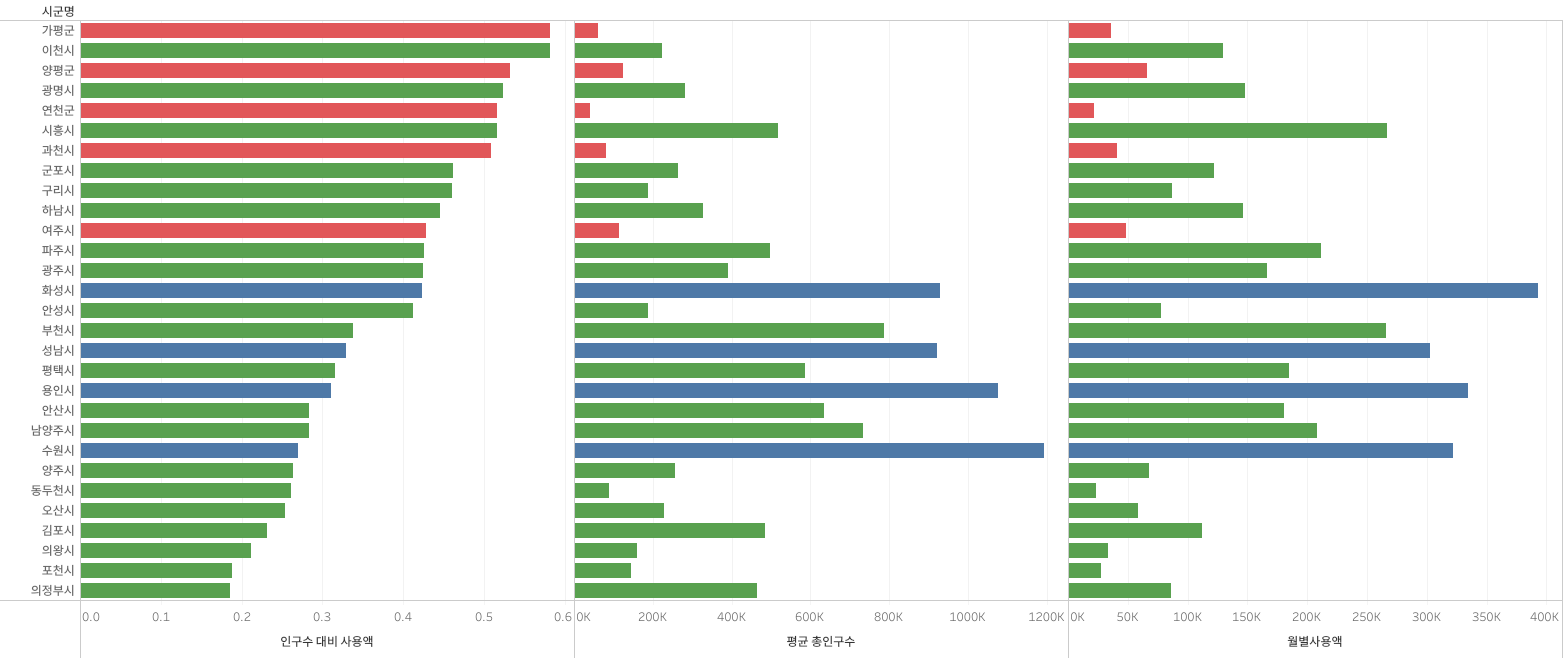

### * 유동인구

경기데이터드림 
- 시군별 유동인구 데이터 : 시군별 월 단위 일일 평균 유동인구 데이터

In [10]:
## 시군별 유동인구 데이터
move = pd.read_csv('../data/경기도/원본/유동인구/시군별유동인구데이터.csv',encoding='cp949')
move

,년월,출발지(야간체류지) 시군코드,출발지역명,도착지 시군코드,도착지역명,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구
0,202003,50110,N,41610,N,5.32,2.23,14.09,12.58,13.03,5.11,4.00,1.54,5.95,5.69,8.06,4.80,2.04,6.32
1,202003,50110,N,41630,N,1.22,2.75,4.91,4.16,4.50,2.51,0.29,0.85,0.44,2.14,2.88,2.84,1.49,1.13
2,202003,50110,N,41650,N,0.44,5.62,2.76,4.19,3.93,2.24,1.29,1.14,2.79,2.61,1.41,2.07,1.28,1.51
3,202003,50110,N,41670,N,0.14,0.80,2.56,5.25,6.39,2.38,0.76,1.15,2.08,2.38,2.97,1.12,2.57,0.30
4,202003,50110,N,41800,N,0.11,1.04,0.64,1.06,0.59,0.19,0.00,0.10,0.57,0.56,0.06,0.00,0.58,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85099,202012,43130,N,41480,N,2.58,23.99,9.56,13.18,9.89,4.22,1.66,0.36,24.21,4.28,6.29,3.58,2.33,1.95
85100,202012,43130,N,41500,N,20.42,56.43,70.36,95.04,103.09,46.47,11.65,39.20,37.42,31.18,38.50,47.00,23.74,15.55
85101,202012,43130,N,41550,N,26.22,33.69,28.72,53.17,44.55,21.85,5.36,9.44,32.81,26.23,23.33,12.36,5.90,3.24
85102,202012,43130,N,41570,N,11.37,29.05,7.84,17.33,21.98,10.14,0.50,2.97,14.63,2.35,2.32,5.91,4.13,3.68


In [11]:
print(move['출발지(야간체류지) 시군코드'].nunique())
print(move['도착지 시군코드'].nunique())

229
31


In [12]:
# 출발지역명, 도착지역명 컬럼 제거
move.drop(columns=['출발지역명','도착지역명'],inplace=True)

# 유입인구 관련 컬럼만 선택하여 합계 계산
columns_to_sum_new = [col for col in move.columns if '유입인구' in col]
move['종합 유입인구'] = move[columns_to_sum_new].sum(axis=1)

In [13]:
# 컬럼명 변경
move.columns = ['년월', '출발지코드', '도착지코드', '10대남성 유입인구', '20대남성 유입인구',
       '30대남성 유입인구', '40대남성 유입인구', '50대남성 유입인구', '60대남성 유입인구', '70대남성 유입인구',
       '10대여성 유입인구', '20대여성 유입인구', '30대여성 유입인구', '40대여성 유입인구', '50대여성 유입인구',
       '60대여성 유입인구', '70대여성 유입인구', '종합 유입인구']
move

,년월,출발지코드,도착지코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구,종합 유입인구
0,202003,50110,41610,5.32,2.23,14.09,12.58,13.03,5.11,4.00,1.54,5.95,5.69,8.06,4.80,2.04,6.32,90.76
1,202003,50110,41630,1.22,2.75,4.91,4.16,4.50,2.51,0.29,0.85,0.44,2.14,2.88,2.84,1.49,1.13,32.11
2,202003,50110,41650,0.44,5.62,2.76,4.19,3.93,2.24,1.29,1.14,2.79,2.61,1.41,2.07,1.28,1.51,33.28
3,202003,50110,41670,0.14,0.80,2.56,5.25,6.39,2.38,0.76,1.15,2.08,2.38,2.97,1.12,2.57,0.30,30.85
4,202003,50110,41800,0.11,1.04,0.64,1.06,0.59,0.19,0.00,0.10,0.57,0.56,0.06,0.00,0.58,0.83,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85099,202012,43130,41480,2.58,23.99,9.56,13.18,9.89,4.22,1.66,0.36,24.21,4.28,6.29,3.58,2.33,1.95,108.08
85100,202012,43130,41500,20.42,56.43,70.36,95.04,103.09,46.47,11.65,39.20,37.42,31.18,38.50,47.00,23.74,15.55,636.05
85101,202012,43130,41550,26.22,33.69,28.72,53.17,44.55,21.85,5.36,9.44,32.81,26.23,23.33,12.36,5.90,3.24,326.87
85102,202012,43130,41570,11.37,29.05,7.84,17.33,21.98,10.14,0.50,2.97,14.63,2.35,2.32,5.91,4.13,3.68,134.20


In [14]:
# 시군코드, 시군명 변경
시군코드 = [41610, 41630, 41650, 41670, 41800, 41820, 41830, 41110, 41130,
       41150, 41170, 41190, 41210, 41220, 41250, 41270, 41280, 41290,
       41310, 41360, 41370, 41390, 41550, 41570, 41590, 41410, 41430,
       41450, 41460, 41480, 41500]
시군명 = ['광주시','양주시','포천시','여주시','연천군','가평군','양평군','수원시','성남시','의정부시','안양시','부천시','광명시',
'평택시','동두천시','안산시','고양시','과천시','구리시','남양주시','오산시','시흥시','안성시','김포시','화성시','군포시','의왕시',
'하남시','용인시','파주시','이천시']

for code, name in zip(시군코드, 시군명):
    move['도착지코드'] = move['도착지코드'].replace(code, name)
    move['출발지코드'] = move['출발지코드'].replace(code, name)
    print(f"'{code}'코드 '{name}'로 변경완료")

move

'41610'코드 '광주시'로 변경완료
'41630'코드 '양주시'로 변경완료
'41650'코드 '포천시'로 변경완료
'41670'코드 '여주시'로 변경완료
'41800'코드 '연천군'로 변경완료
'41820'코드 '가평군'로 변경완료
'41830'코드 '양평군'로 변경완료
'41110'코드 '수원시'로 변경완료
'41130'코드 '성남시'로 변경완료
'41150'코드 '의정부시'로 변경완료
'41170'코드 '안양시'로 변경완료
'41190'코드 '부천시'로 변경완료
'41210'코드 '광명시'로 변경완료
'41220'코드 '평택시'로 변경완료
'41250'코드 '동두천시'로 변경완료
'41270'코드 '안산시'로 변경완료
'41280'코드 '고양시'로 변경완료
'41290'코드 '과천시'로 변경완료
'41310'코드 '구리시'로 변경완료
'41360'코드 '남양주시'로 변경완료
'41370'코드 '오산시'로 변경완료
'41390'코드 '시흥시'로 변경완료
'41550'코드 '안성시'로 변경완료
'41570'코드 '김포시'로 변경완료
'41590'코드 '화성시'로 변경완료
'41410'코드 '군포시'로 변경완료
'41430'코드 '의왕시'로 변경완료
'41450'코드 '하남시'로 변경완료
'41460'코드 '용인시'로 변경완료
'41480'코드 '파주시'로 변경완료
'41500'코드 '이천시'로 변경완료


,년월,출발지코드,도착지코드,10대남성 유입인구,20대남성 유입인구,30대남성 유입인구,40대남성 유입인구,50대남성 유입인구,60대남성 유입인구,70대남성 유입인구,10대여성 유입인구,20대여성 유입인구,30대여성 유입인구,40대여성 유입인구,50대여성 유입인구,60대여성 유입인구,70대여성 유입인구,종합 유입인구
0,202003,50110,광주시,5.32,2.23,14.09,12.58,13.03,5.11,4.00,1.54,5.95,5.69,8.06,4.80,2.04,6.32,90.76
1,202003,50110,양주시,1.22,2.75,4.91,4.16,4.50,2.51,0.29,0.85,0.44,2.14,2.88,2.84,1.49,1.13,32.11
2,202003,50110,포천시,0.44,5.62,2.76,4.19,3.93,2.24,1.29,1.14,2.79,2.61,1.41,2.07,1.28,1.51,33.28
3,202003,50110,여주시,0.14,0.80,2.56,5.25,6.39,2.38,0.76,1.15,2.08,2.38,2.97,1.12,2.57,0.30,30.85
4,202003,50110,연천군,0.11,1.04,0.64,1.06,0.59,0.19,0.00,0.10,0.57,0.56,0.06,0.00,0.58,0.83,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85099,202012,43130,파주시,2.58,23.99,9.56,13.18,9.89,4.22,1.66,0.36,24.21,4.28,6.29,3.58,2.33,1.95,108.08
85100,202012,43130,이천시,20.42,56.43,70.36,95.04,103.09,46.47,11.65,39.20,37.42,31.18,38.50,47.00,23.74,15.55,636.05
85101,202012,43130,안성시,26.22,33.69,28.72,53.17,44.55,21.85,5.36,9.44,32.81,26.23,23.33,12.36,5.90,3.24,326.87
85102,202012,43130,김포시,11.37,29.05,7.84,17.33,21.98,10.14,0.50,2.97,14.63,2.35,2.32,5.91,4.13,3.68,134.20


In [15]:
# 필요한 컬럼만 필터
total_move = move[['년월','출발지코드','도착지코드','종합 유입인구']]
total_move

,년월,출발지코드,도착지코드,종합 유입인구
0,202003,50110,광주시,90.76
1,202003,50110,양주시,32.11
2,202003,50110,포천시,33.28
3,202003,50110,여주시,30.85
4,202003,50110,연천군,6.33
...,...,...,...,...
85099,202012,43130,파주시,108.08
85100,202012,43130,이천시,636.05
85101,202012,43130,안성시,326.87
85102,202012,43130,김포시,134.20


In [19]:
# 출발지코드가 숫자인 경우 '경기도외'로 변경 (경기도 내 지역은 시군이름으로 변경되어 있다.)
total_move['출발지코드'] = total_move['출발지코드'].apply(lambda x: '경기도외' if isinstance(x, int) else x)
total_move

,년월,출발지코드,도착지코드,종합 유입인구
0,202003,경기도외,광주시,90.76
1,202003,경기도외,양주시,32.11
2,202003,경기도외,포천시,33.28
3,202003,경기도외,여주시,30.85
4,202003,경기도외,연천군,6.33
...,...,...,...,...
85099,202012,경기도외,파주시,108.08
85100,202012,경기도외,이천시,636.05
85101,202012,경기도외,안성시,326.87
85102,202012,경기도외,김포시,134.20


In [20]:
# 분리되어 있는 '경기도외'
total_move[total_move['도착지코드'] == '광주시']

,년월,출발지코드,도착지코드,종합 유입인구
0,202003,경기도외,광주시,90.76
25,202003,경기도외,광주시,12.11
56,202003,경기도외,광주시,80.34
70,202003,경기도외,광주시,32.56
101,202003,경기도외,광주시,16.85
...,...,...,...,...
84960,202012,경기도외,광주시,29.26
84983,202012,동두천시,광주시,93.40
84996,202012,경기도외,광주시,25.05
85027,202012,경기도외,광주시,27.05


In [22]:
## 도착지코드, 출발지코드, 년월 기준으로 그룹화하여 종합 유입인구 합계 계산
total_move = total_move.groupby(['년월', '출발지코드', '도착지코드']).sum().reset_index()

total_move[total_move['출발지코드'] == '경기도외']

# 행의 개수가 372개 (31시군 * 12개월)로 '경기도외'가 모두 합쳐진 것을 확인할 수 있다.

,년월,출발지코드,도착지코드,종합 유입인구
31,202001,경기도외,가평군,23986.63
32,202001,경기도외,고양시,175189.68
33,202001,경기도외,과천시,23224.41
34,202001,경기도외,광명시,75034.50
35,202001,경기도외,광주시,42391.49
...,...,...,...,...
10969,202012,경기도외,파주시,50105.87
10970,202012,경기도외,평택시,47213.70
10971,202012,경기도외,포천시,26741.21
10972,202012,경기도외,하남시,68760.50


In [23]:
## 출발지코드와 도착지코드 기준으로 그룹화하여 종합 유입인구의 평균 계산
# 32 * 31 로 992개의 행
total_move = total_move.groupby(['출발지코드', '도착지코드'])['종합 유입인구'].mean().reset_index()
total_move

,출발지코드,도착지코드,종합 유입인구
0,가평군,가평군,57201.137500
1,가평군,고양시,211.448333
2,가평군,과천시,15.983333
3,가평군,광명시,34.633333
4,가평군,광주시,100.250833
...,...,...,...
987,화성시,파주시,775.716667
988,화성시,평택시,13643.793333
989,화성시,포천시,453.536667
990,화성시,하남시,776.471667


출발지 코드는 경기도지역(31개) + 경기도외(1개)이므로 지역 유입인구는 정확히 알 수 있다.

그러나 도착지 코드는 경기도지역(31개) 밖에 없어 지역 유출인구를 정확히 파악할 수 없다.

지역 유출인구를 확인하기 위하여 다른 데이터를 찾던 도중 생활인구 데이터를 찾게 되었다.

### * 생활인구
라이프로그 빅데이터 플랫폼(https://www.bigdata-lifelog.kr/portal/find/dataList?mode=detail&name=lgu20221123080742)
- 경기도(시군단위)생활인구 : 경기도 시/군단위(31개) 지역에서 특정 시점에 머무르는 모든 인구의 이동, 분포 및 체류 정보를 알 수 있는 데이터

In [25]:
# 가평군 데이터 확인
life_popul = pd.read_csv('../data/경기도/원본/생활인구/경기도 가평군 생활인구 수_21년 12월.csv')
life_popul

,"﻿""INDEX_KEY""",CRTR_YMD,CRTR_WEEK,DWK_NM,CTPV_CD,CTPV_NM,SGG_CD,SGG_NM,TMZN_CD,SEX_DV,AGRDE_CLS,REVISN_LIVE_PUL_CNT
0,LI122200010009LI12220001000925941,20211211,49,토,41,경기도,4182,가평군,9,MALE,4,4205.350192
1,LI122200010009LI12220001000925942,20211219,50,일,41,경기도,4182,가평군,21,FEMALE,10,2462.758279
2,LI122200010009LI12220001000925943,20211217,50,금,41,경기도,4182,가평군,12,FEMALE,5,1346.965038
3,LI122200010009LI12220001000925944,20211225,51,토,41,경기도,4182,가평군,6,FEMALE,1,1102.000117
4,LI122200010009LI12220001000925945,20211224,51,금,41,경기도,4182,가평군,16,MALE,8,3091.180932
...,...,...,...,...,...,...,...,...,...,...,...,...
20826,LI122200010009LI122200010009259420827,20211209,49,목,41,경기도,4182,가평군,6,MALE,1,439.310906
20827,LI122200010009LI122200010009259420828,20211212,49,일,41,경기도,4182,가평군,12,FEMALE,6,3253.987167
20828,LI122200010009LI122200010009259420829,20211204,48,토,41,경기도,4182,가평군,8,MALE,12,4124.119069
20829,LI122200010009LI122200010009259420830,20211203,48,금,41,경기도,4182,가평군,6,MALE,7,1798.632393


In [26]:
## 31개 시군 csv 하나로 합치기

# 파일 경로 지정
path = '../data/경기도/원본/생활인구/'

# 모든 CSV 파일 목록 생성
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.CSV')]

# 각 파일을 데이터프레임으로 읽어오고 하나의 리스트에 저장
dataframes = [pd.read_csv(file) for file in all_files]

# 모든 데이터프레임을 하나로 합치기
combined_csv = pd.concat(dataframes, ignore_index=True)

combined_csv

,"﻿""INDEX_KEY""",CRTR_YMD,CRTR_WEEK,DWK_NM,CTPV_CD,CTPV_NM,SGG_CD,SGG_NM,TMZN_CD,SEX_DV,AGRDE_CLS,REVISN_LIVE_PUL_CNT
0,LI122200010009LI12220001000925941,20211211,49,토,41,경기도,4182,가평군,9,MALE,4,4205.350192
1,LI122200010009LI12220001000925942,20211219,50,일,41,경기도,4182,가평군,21,FEMALE,10,2462.758279
2,LI122200010009LI12220001000925943,20211217,50,금,41,경기도,4182,가평군,12,FEMALE,5,1346.965038
3,LI122200010009LI12220001000925944,20211225,51,토,41,경기도,4182,가평군,6,FEMALE,1,1102.000117
4,LI122200010009LI12220001000925945,20211224,51,금,41,경기도,4182,가평군,16,MALE,8,3091.180932
...,...,...,...,...,...,...,...,...,...,...,...,...
645782,LI122200010009LI122200010009262420828,20211209,49,목,41,경기도,4159,화성시,0,FEMALE,11,25126.109810
645783,LI122200010009LI122200010009262420829,20211230,52,목,41,경기도,4159,화성시,22,FEMALE,14,30501.493710
645784,LI122200010009LI122200010009262420830,20211206,49,월,41,경기도,4159,화성시,9,MALE,11,38676.031750
645785,LI122200010009LI122200010009262420831,20211201,48,수,41,경기도,4159,화성시,23,FEMALE,6,33015.606500


In [27]:
## 필요한 컬럼만 필터
totallife_popul = combined_csv[['CRTR_YMD','DWK_NM','SGG_NM','TMZN_CD','REVISN_LIVE_PUL_CNT']]

# 컬럼명 변경
totallife_popul.columns = ['날짜','요일','시군명','시간대','인구수']
totallife_popul

,날짜,요일,시군명,시간대,인구수
0,20211211,토,가평군,9,4205.350192
1,20211219,일,가평군,21,2462.758279
2,20211217,금,가평군,12,1346.965038
3,20211225,토,가평군,6,1102.000117
4,20211224,금,가평군,16,3091.180932
...,...,...,...,...,...
645782,20211209,목,화성시,0,25126.109810
645783,20211230,목,화성시,22,30501.493710
645784,20211206,월,화성시,9,38676.031750
645785,20211201,수,화성시,23,33015.606500


In [28]:
## '날짜', '요일', '시군명', '시간대'를 기준으로 그룹화하여 '인구수' 합계 계산 (성별 나누어져 있는 것 합치기)
totallife_popul = totallife_popul.groupby(['날짜', '요일', '시군명', '시간대']).agg({'인구수': 'sum'}).reset_index()
totallife_popul

,날짜,요일,시군명,시간대,인구수
0,20211201,수,가평군,0,62015.888111
1,20211201,수,가평군,1,62000.174606
2,20211201,수,가평군,2,62199.118585
3,20211201,수,가평군,3,62535.568211
4,20211201,수,가평군,4,62623.389955
...,...,...,...,...,...
23059,20211231,금,화성시,19,872115.566366
23060,20211231,금,화성시,20,863595.859019
23061,20211231,금,화성시,21,859296.678008
23062,20211231,금,화성시,22,859428.377135


In [29]:
## 대략적인 인구수 추이 확인
totallife_popul.loc[(totallife_popul['날짜'] == 20211204) & (totallife_popul['시군명'] == '가평군')]

# 평일 주말 구분을 두려하였으나, 상관없이 소비가 제일 많을 것으로 예상되는 시간인 11,12,13,18,19,20,21 시간대를 사용하기로 결정

,날짜,요일,시군명,시간대,인구수
2232,20211204,토,가평군,0,72436.441601
2233,20211204,토,가평군,1,69984.096540
2234,20211204,토,가평군,2,69255.861133
2235,20211204,토,가평군,3,68703.444227
2236,20211204,토,가평군,4,68765.451590
2237,20211204,토,가평군,5,68606.507972
2238,20211204,토,가평군,6,69412.942243
2239,20211204,토,가평군,7,71632.251480
2240,20211204,토,가평군,8,76065.952417
2241,20211204,토,가평군,9,77458.508781


In [30]:
## 시간대 필터
filter_popul = totallife_popul[totallife_popul['시간대'].isin((11,12,13,18,19,20,21))]

# 원본 데이터에서 '시군명'별로 그룹화하고, 하루 인구수 평균 계산
filter_popul = filter_popul.groupby('시군명')['인구수'].mean().reset_index()
filter_popul['인구수'] = filter_popul['인구수'].astype(int)

filter_popul

,시군명,인구수
0,가평군,72214
1,고양시,992201
2,과천시,83240
3,광명시,249443
4,광주시,354899
5,구리시,176175
6,군포시,244694
7,김포시,469345
8,남양주시,653388
9,동두천시,86257


In [36]:
## 23년 지역화폐 사용량 df에 합산
use_2023 = pd.read_csv('../data/경기도/전처리 후/생활인구,거주인구.csv')
use_2023

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,가맹점수,생활인구수,인당사용액(생활),인당사용액(거주)
0,2023-01,가평군,62114,717.0,3140,3540,3354,72214,49020,56991
1,2023-02,가평군,62069,769.0,3032,3092,3354,72214,42817,49815
2,2023-03,가평군,61969,3130.0,4284,3609,3354,72214,49976,58238
3,2023-04,가평군,61915,855.0,3668,4057,3354,72214,56180,65525
4,2023-05,가평군,61836,871.0,5064,3785,3354,72214,52413,61210
...,...,...,...,...,...,...,...,...,...,...
338,2023-07,화성시,932626,8026.0,36869,36480,27663,919545,39671,39115
339,2023-08,화성시,934287,7804.0,34116,35008,27663,919545,38071,37470
340,2023-09,화성시,937189,7792.0,40559,36188,27663,919545,39354,38613
341,2023-10,화성시,939302,7667.0,37117,38199,27663,919545,41541,40667


![인당사용액 거주vs생활-2.png](<attachment:인당사용액 거주vs생활-2.png>)
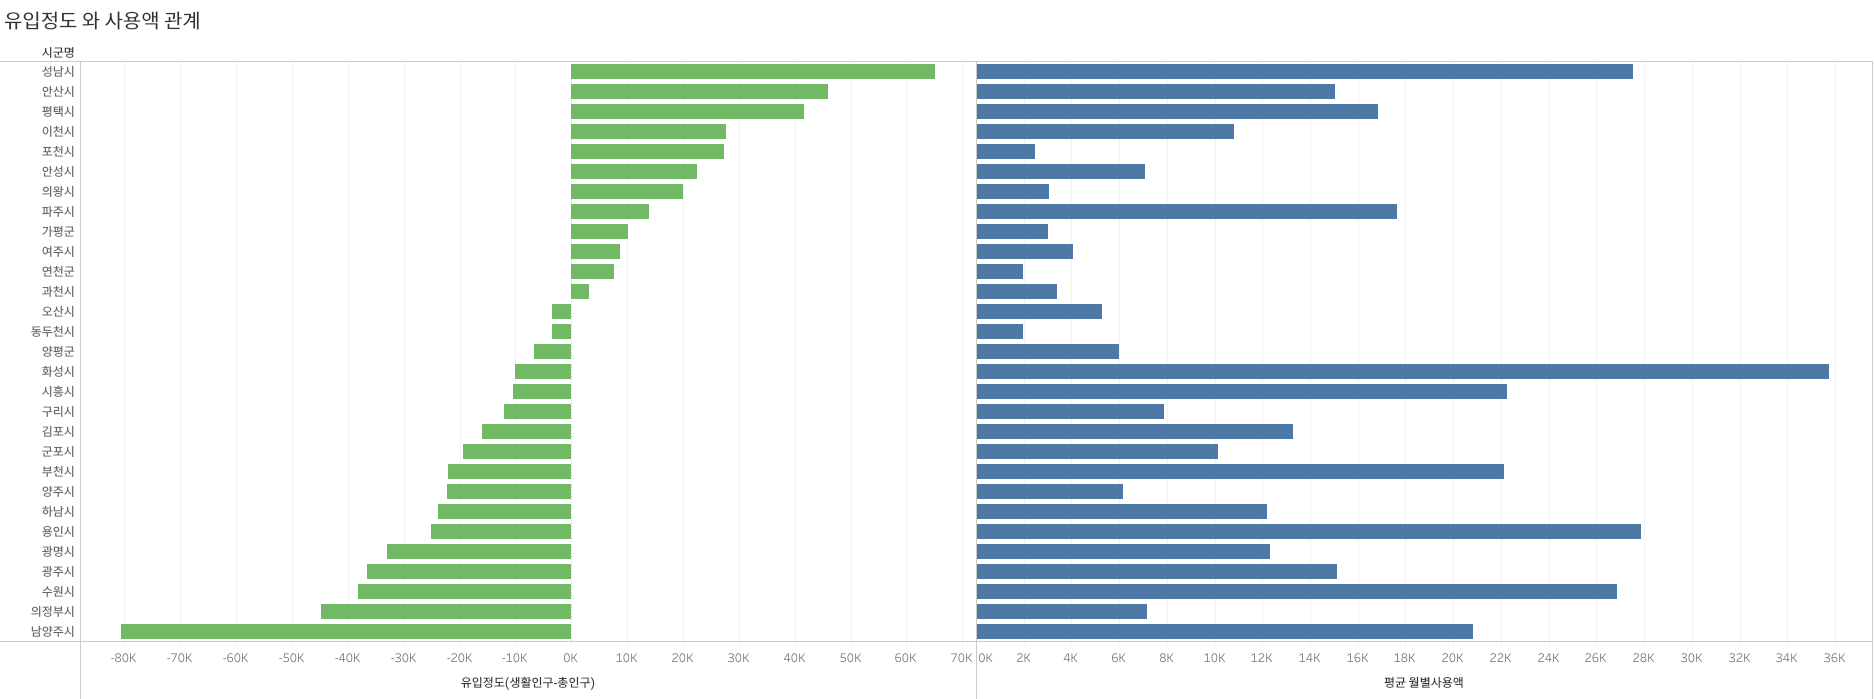
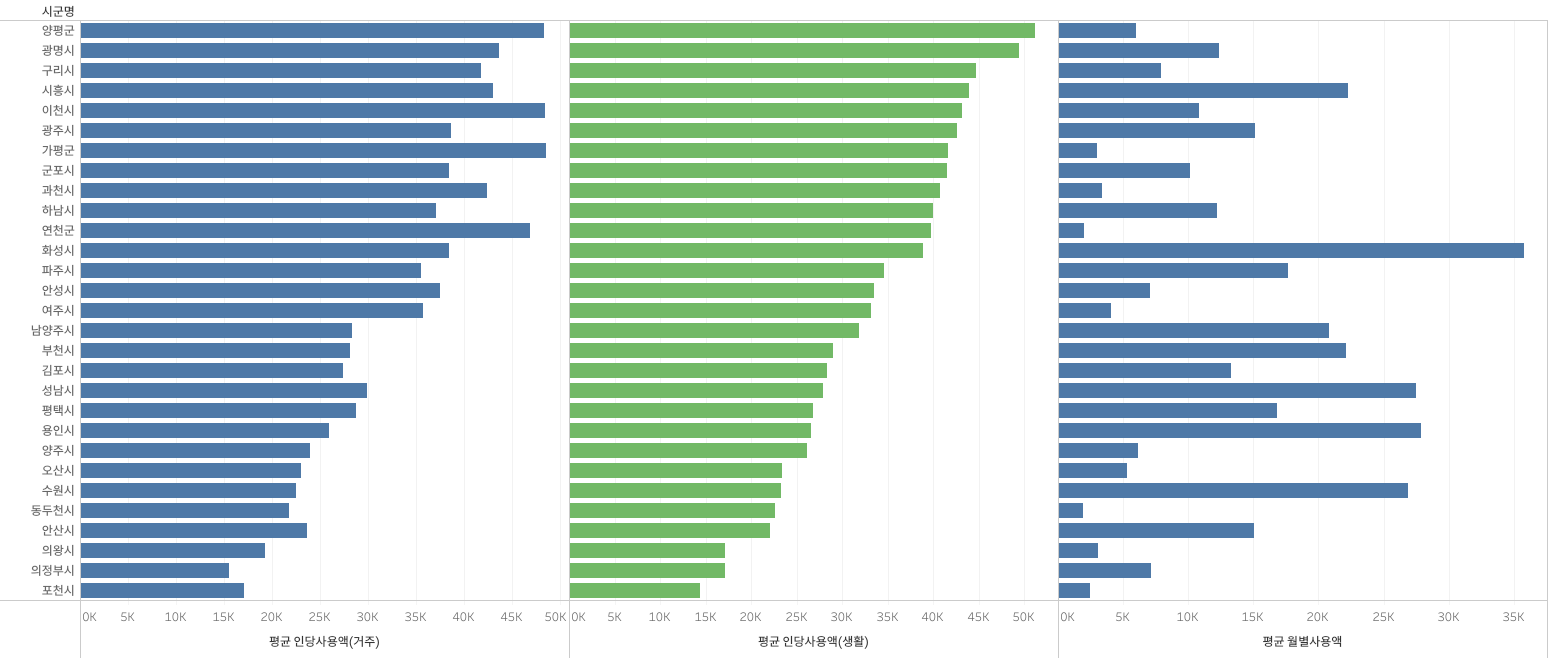

경기도 주민등록 인구 현황 데이터에서 연령대 인구 추출

In [73]:
## 연령별 인구 포함 데이터
popul_2023_age = pd.read_csv('./data/연령대 인구 포함 popul_2023_age.csv')
popul_2023_age

,시군명,기준년월,신규가입자,월별충전액,월별사용액,가맹점수,총인구수,생활인구수,20~29세,30~39세,40~49세,50~59세,60세 이상
0,가평군,2023-12,484.0,4051,2140,3354,62302,72214,5700,5437,7459,10845,25749
1,가평군,2023-11,458.0,2368,2187,3354,62131,72214,5677,5426,7435,10788,25686
2,가평군,2023-10,555.0,2596,2335,3354,62125,72214,5685,5415,7438,10767,25662
3,가평군,2023-09,782.0,3113,2376,3354,61976,72214,5681,5383,7438,10736,25587
4,가평군,2023-08,473.0,3631,2392,3354,61773,72214,5689,5315,7410,10715,25489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,화성시,2023-05,6717.0,35058,37413,27663,928550,919545,110625,153118,181286,133438,145333
368,화성시,2023-04,8440.0,35557,35525,27663,925186,919545,110518,152265,180984,132479,144507
369,화성시,2023-03,9111.0,35906,36982,27663,922231,919545,110109,151668,180807,131884,143344
370,화성시,2023-02,7829.0,30162,33325,27663,918865,919545,109856,150834,180450,131143,142350


In [75]:
# savepoint
popul_2023_age2 = popul_2023_age 

# 연령별 비율
popul_2023_age2['20대 비율'] = popul_2023_age2['20~29세'] / popul_2023_age2['총인구수']
popul_2023_age2['30대 비율'] = popul_2023_age2['30~39세'] / popul_2023_age2['총인구수']
popul_2023_age2['40대 비율'] = popul_2023_age2['40~49세'] / popul_2023_age2['총인구수']
popul_2023_age2['50대 비율'] = popul_2023_age2['50~59세'] / popul_2023_age2['총인구수']
popul_2023_age2['60대 이상 비율'] = popul_2023_age2['60세 이상'] / popul_2023_age2['총인구수']

popul_2023_age2['인당사용액(거주)'] = popul_2023_age2['월별사용액'] / popul_2023_age2['총인구수']
popul_2023_age2

,시군명,기준년월,신규가입자,월별충전액,월별사용액,가맹점수,총인구수,생활인구수,20~29세,30~39세,40~49세,50~59세,60세 이상,20대 비율,30대 비율,40대 비율,50대 비율,60대 이상 비율,인당사용액(거주)
0,가평군,2023-12,484.0,4051,2140,3354,62302,72214,5700,5437,7459,10845,25749,0.091490,0.087268,0.119723,0.174071,0.413293,0.034349
1,가평군,2023-11,458.0,2368,2187,3354,62131,72214,5677,5426,7435,10788,25686,0.091371,0.087332,0.119667,0.173633,0.413417,0.035200
2,가평군,2023-10,555.0,2596,2335,3354,62125,72214,5685,5415,7438,10767,25662,0.091509,0.087163,0.119726,0.173312,0.413070,0.037586
3,가평군,2023-09,782.0,3113,2376,3354,61976,72214,5681,5383,7438,10736,25587,0.091665,0.086856,0.120014,0.173228,0.412853,0.038337
4,가평군,2023-08,473.0,3631,2392,3354,61773,72214,5689,5315,7410,10715,25489,0.092095,0.086041,0.119955,0.173458,0.412624,0.038722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,화성시,2023-05,6717.0,35058,37413,27663,928550,919545,110625,153118,181286,133438,145333,0.119137,0.164900,0.195236,0.143706,0.156516,0.040292
368,화성시,2023-04,8440.0,35557,35525,27663,925186,919545,110518,152265,180984,132479,144507,0.119455,0.164578,0.195619,0.143192,0.156192,0.038398
369,화성시,2023-03,9111.0,35906,36982,27663,922231,919545,110109,151668,180807,131884,143344,0.119394,0.164458,0.196054,0.143005,0.155432,0.040101
370,화성시,2023-02,7829.0,30162,33325,27663,918865,919545,109856,150834,180450,131143,142350,0.119556,0.164153,0.196384,0.142723,0.154919,0.036268


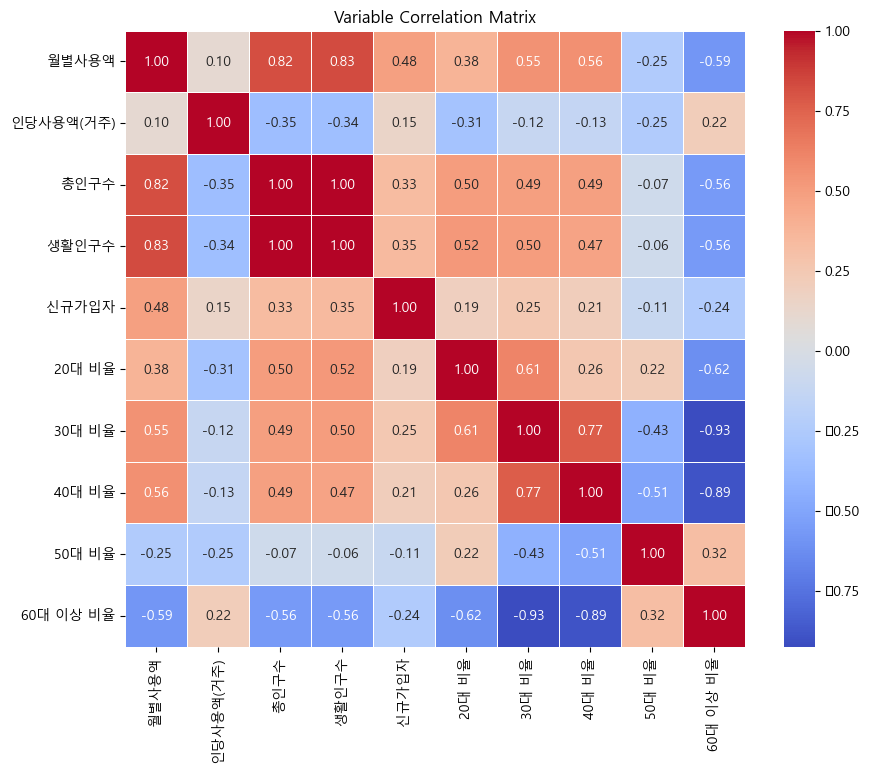

In [81]:
# 상관관계 매트릭스 생성
correlation_matrix = popul_2023_age2[['월별사용액','인당사용액(거주)','총인구수','생활인구수', '신규가입자', '20대 비율', '30대 비율','40대 비율','50대 비율','60대 이상 비율']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

'월별사용액'과 '연령대비율' 상관계수 

'30대 비율', '40대 비율'은 0.55, 0.56 

'60대 이상 비율'은 -0.59 의 상관계수를 보인다.

그러나 이를 지역화페 활성화 지표로 사용하기에는 상관관계가 약하다.


#### 지역화폐 활성화 지표 결론

각종 데이터를 확인해보아도 지역화폐 활성화를 나타내기에 적절한 지표를 찾지 못하였다.

사용액, 충전액 모두 인구수와 아주 높은 상관관계를 보이며, 가맹점 수 또한 인구수와 높은 상관관계를 보인다.

따라서 시군별 지역화폐 활성화 정도를 구분하는 것은 불가능하다고 판단하였다.

## * 차등 캐시백율 정리

지역화폐 활성화 지표 대신 지역화폐 사용액을 기준에 넣기로 결정하였다.

단지 인구가 많은 지역이라고 낮은 점수를 받게되는 지역에 차별을 두기 위함.

지역화페 사용액은 인구수와 높은 상관관계를 보이므로, 지역화폐 사용액 가중치의 상당 부분이 인구수 가중치로 흡수되는 형태가 될 것이 예상된다.

인구소멸 위험지수  0.4
	
인구수		0.2

1인당 GRI		0.2

지역화폐 사용액    0.2

최종 점수를 합산하여 5 등급으로 구분.

In [86]:
total_df = pd.read_csv('./data/종합점수 total_score.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 사용하여 데이터의 범위를 0과 1 사이로 조정
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(total_df[['총인구수', '1인당grdp', '지역화폐사용액', '인구소멸']])

# 정규화된 데이터를 데이터프레임에 다시 할당
df_scaled = pd.DataFrame(scaled_values, columns=['총인구수_scaled', '1인당grdp_scaled', '지역화폐사용액_scaled', '인구소멸_scaled'])

# 종합점수 계산 (가중치 적용)
total_df['종합점수'] = (
    df_scaled['총인구수_scaled'] * 0.2 +
    df_scaled['1인당grdp_scaled'] * 0.2 +
    df_scaled['지역화폐사용액_scaled'] * 0.2 +
    df_scaled['인구소멸_scaled'] * 0.4
)

# 종합점수를 기준으로 5단계로 구분 (qcut 사용)
total_df['등급'] = pd.qcut(total_df['종합점수'], 5, labels=[5, 4, 3, 2, 1])

# 결과 확인
total_df[['시군명', '총인구수', '1인당grdp', '지역화폐사용액', '인구소멸', '종합점수', '등급']].head()

In [ ]:
total_df[total_df['등급'] == 2]

,시군명,총인구수,1인당grdp,지역화폐사용액,인구소멸,종합점수,등급
1,고양시,1076950,2114,11730,0.91,0.461967,2
7,김포시,485451,3235,14046,0.98,0.417043,2
10,부천시,785650,2227,22132,0.89,0.467965,2
14,안산시,635295,3964,15036,1.12,0.510419,2
24,이천시,222830,12993,10805,0.81,0.464662,2
25,파주시,496860,5080,17651,0.85,0.427560,2


In [87]:
# 각 등급별로 속한 시군명 출력
cities_per_grade = {grade: total_df[total_df['등급'] == grade]['시군명'].tolist() for grade in [1, 2, 3, 4, 5]}

cities_per_grade

{1: ['성남시', '수원시', '시흥시', '용인시', '평택시', '화성시'],
 2: ['고양시', '김포시', '부천시', '안산시', '이천시', '파주시'],
 3: ['과천시', '광명시', '광주시', '남양주시', '오산시', '하남시'],
 4: ['구리시', '군포시', '안성시', '양주시', '의왕시', '의정부시'],
 5: ['가평군', '동두천시', '양평군', '여주시', '연천군', '포천시']}

다연상관계수 나이대 사용액 상관계수 파악에 용이

전달 대비 신규가입자수 

상관계수 다 시도해보기

가중치를 회귀로 설정

회귀로 가중치 